In [2]:
from qcportal import PortalClient
from openff.toolkit.topology import Molecule
from chargecraft.storage.qcarchive_transfer import QCArchiveToLocalDB
import numpy as np
import matplotlib.pyplot as plt
from chargecraft.storage.storage import MoleculePropStore, MoleculePropRecord
import pandas as pd
import seaborn as sns
import io 
from sklearn.metrics import mean_squared_error
from ast import literal_eval
import json
import ast



The OpenEye Toolkits are found to be installed but not licensed and therefore will not be used.
The OpenEye Toolkits require a (free for academics) license, see https://docs.eyesopen.com/toolkits/python/quickstart-python/license.html
The OpenEye Toolkits are found to be installed but not licensed and therefore will not be used.
The OpenEye Toolkits require a (free for academics) license, see https://docs.eyesopen.com/toolkits/python/quickstart-python/license.html


In [6]:
DATASET_NAME = "ESP 50k opt Iodines"

client = PortalClient(address="http://10.64.1.130:7778")

dataset = client.get_dataset(dataset_type="singlepoint", dataset_name=DATASET_NAME)


add_data = []
for spec in dataset.specification_names:
    for index, _, record in dataset.iterate_records(specification_names=spec, status="complete"):
        record_data = {
            "specification": spec,
            "molecule": index,
            "tagged_smiles":Molecule.from_qcschema(record.molecule).to_smiles(mapped = True),
            "basis": record.specification.basis,
            "method": record.specification.method,
            "conformer_geom" : Molecule.from_qcschema(record.molecule).conformers[0].m,
            "dipole": record.properties["scf dipole"],
            "charges": record.properties["mbis charges"],
            "mbis dipoles": record.properties["mbis dipoles"],
            "mbis quadrupoles": record.properties["mbis quadrupoles"],
            "wall time": record.provenance.wall_time
        }
        add_data.append(record_data)

df = pd.DataFrame(add_data)
df.to_csv("benchmark_data.csv")
df

,specification,molecule,tagged_smiles,basis,method,conformer_geom,dipole,charges,mbis dipoles,mbis quadrupoles,wall time
0,B3LYP-def2-tzvpp-ddx-4 COSMO,O=C1CCCN1,[C:1]1([H:7])([H:8])[C:2]([H:9])([H:10])[C:3](...,def2-tzvpp,b3lyp,"[[-0.982553393564454, -0.41076041732955887, -0...","[-1.532449716713792, 0.3019967472080447, 0.292...","[-0.20804845452580892, -0.3932938413573904, 0....","[0.07094123252931848, -0.01095060119539471, 0....","[-4.669255697389643, 0.010699167659082765, -0....",58.574889
1,B3LYP-def2-tzvpp-ddx-4 COSMO,CC,[C:1]([C:2]([H:6])([H:7])[H:8])([H:3])([H:4])[...,def2-tzvpp,b3lyp,"[[-0.7612104398492733, 0.01704434912537183, 0....","[-4.941608047204227e-07, 5.681966593673593e-06...","[-0.33407577552519196, -0.3340763514043221, 0....","[0.09947365267204596, -0.0022396020979063777, ...","[-4.994770589425536, 0.002483199648644834, 0.0...",16.102609
2,B3LYP-def2-tzvpp-ddx-4 COSMO,[O-]c1ccsn1,[C:1]1([H:7])=[C:2]([H:8])[S:3][N:4]=[C:5]1[O-:6],def2-tzvpp,b3lyp,"[[-0.09838226317818206, -0.7134580947913648, -...","[-2.511146951068973, -1.1544555919723294, 0.08...","[-0.38431747607946876, -0.22066792647695813, -...","[-0.00548802241160822, -0.02581910061411366, -...","[-5.213319526110488, -0.019598138349463157, 0....",28.026301
3,B3LYP-def2-tzvpp-ddx-4 COSMO,[S-]c1ccccc1,[c:1]1([H:8])[c:2]([H:9])[c:3]([H:10])[c:4]([S...,def2-tzvpp,b3lyp,"[[-1.4724835546710437, -0.07926821077587926, 0...","[-3.759321700042406, -0.20229196885709655, 0.0...","[-0.23704316594895652, -0.14937853452689054, -...","[0.04335967414719804, 0.0022346584432770067, -...","[-4.84510585900858, 0.006723940562006063, -3.5...",55.181361
4,B3LYP-def2-tzvpp-ddx-4 COSMO,Cc1c[nH]c2ccccc12,[C:1]([C:2]1=[C:3]([H:14])[N:4]([H:15])[c:5]2[...,def2-tzvpp,b3lyp,"[[-2.68562701324495, -0.6306270840306415, 0.11...","[-0.2191767702564249, 0.7682542774233561, -0.0...","[-0.38086737871178744, -0.012011216211263106, ...","[0.07333287160420629, 0.04577896358262872, -0....","[-5.0034470464019325, -0.0497170051621309, 0.0...",159.718398
...,...,...,...,...,...,...,...,...,...,...,...
1423,HF-6-311G*-ddx-4 COSMO,C1CCNC1,[C:1]1([H:6])([H:7])[C:2]([H:8])([H:9])[C:3]([...,6-311g*,hf,"[[0.17920492040989322, -1.2075743017523302, -0...","[-0.03622914786590847, 0.060269069645700224, 0...","[-0.21185677229070005, -0.21194751007209334, 0...","[0.014344993900902853, 0.07129644539847031, -0...","[-4.76561564784185, -0.008833999558026578, 0.0...",28.065999
1424,HF-6-311G*-ddx-4 COSMO,C1CC[NH2+]CC1,[C:1]1([H:7])([H:8])[C:2]([H:9])([H:10])[C:3](...,6-311g*,hf,"[[1.2189360585436484, 0.8347455054911456, -0.1...","[-1.3730323309458865, -0.9404638887922252, 0.1...","[-0.18938502741797833, -0.2505335148556997, -0...","[-0.05012621210499858, -0.03422824903999698, -...","[-4.635432333646393, 0.016771858822020987, -0....",49.469058
1425,HF-6-311G*-ddx-4 COSMO,C1CCOC1,[C:1]1([H:6])([H:7])[C:2]([H:8])([H:9])[C:3]([...,6-311g*,hf,"[[-1.0539122005224388, -0.11304499997276835, 0...","[-0.6050645442135583, 0.38722348449260124, -0....","[-0.27494939943492386, -0.2749581695600586, 0....","[0.038448020519036376, 0.03685304637260804, -0...","[-4.830348165944442, 0.02527154076787095, 0.05...",24.766154
1426,HF-6-311G*-ddx-4 COSMO,c1ccsc1,[C:1]1([H:6])=[C:2]([H:7])[S:3][C:4]([H:8])=[C...,6-311g*,hf,"[[0.7233627745021358, -0.6834895325376262, -0....","[0.0026471905835756537, -0.3271964131655736, -...","[-0.1441973603432213, -0.24635838746870145, 0....","[-0.0372836370090917, -0.03182698915736674, -0...","[-4.703367828714137, -0.0327189557300603, -0.0...",12.260116


In [ ]:
prop_store = MoleculePropStore('/mnt/storage/nobackup/nca121/QC_archive_review/benchmark_review/benchmark.db')
smiles_list = df['molecule'].unique()
add_data = []
for mol in smiles_list:
    print(mol)
    try:
      
        record_data = {
                "specification": 'ccsd-aug-cc-pVTZP',
                "molecule": mol,
                "basis": 'aug-cc-pVTZP',
                "conformer_geom": item[0].conformer,
                "dipole": item[0].dipole,
                "charges": item[0].mbis_charges.flatten(),
                "mbis dipoles": item[0].mbis_dipole.flatten(),
                "mbis quadrupoles": item[0].mbis_quadropole.flatten(),
                "esp": item[0].esp_quantity,
                "grid": item[0].grid_coordinates_quantity,
            }
        add_data.append(record_data)
    except IndexError:
        continue
df_ccsd = pd.DataFrame(add_data)

array(['c1ccccc1', 'CC(=O)O', 'CC1=CNc2c1cccc2', 'C1=CSC=C1',
       'C1CC(=O)NC1', 'C1=CSN=C1[O-]', 'CC(C)F', 'c1ccc(cc1)F',
       'c1cc(cnc1)Cl', '[B-](COC)(F)(F)F', 'CC', 'COC', 'C1CC[NH2+]CC1',
       'c1ccc(cc1)[S-]', 'c1ccc(cc1)C#N', 'CP(=O)([O-])[O-]',
       'c1ccc(cc1)Cl', 'COCC(F)(F)F', 'C1=CNC=C1Br', 'C[Si]1(CCCC1)C',
       'c1cc(c(c(c1)F)F)F', 'CCO', 'CC(=O)C', 'B(O)(O)OCC',
       'CS(=O)(=O)[O-]', 'c1ccc(cc1)Br', 'C1=C[NH+]=CN1', 'C1CCNC1',
       'CCSC', 'CCS', 'CO[Si](C)(C)O', 'c1ccc(cc1)O', 'C1CCOC1',
       'CC(=O)[O-]', 'c1ccc(cc1)N', 'c1ccc(cc1)I'], dtype=object)

In [9]:
# prop_store = MoleculePropStore('/mnt/storage/nobackup/nca121/QC_archive_review/benchmark_review/benchmark.db')
prop_store = MoleculePropStore('/mnt/nfs/home/nca121/benchmark_db/rerun_for_paper/ccsd_database.db')
smiles_list = df['molecule'].unique()
add_data = []
for mol in smiles_list:
    print(mol)
    try:
        item =  prop_store.retrieve(smiles=mol,method='ccsd',basis='aug-cc-pvtz')
        record_data = {
                "specification": 'ccsd-aug-cc-pVTZP',
                "molecule": mol,
                "basis": 'aug-cc-pVTZP',
                "conformer_geom": item[0].conformer,
                "dipole": item[0].dipole,
                "charges": item[0].mbis_charges.flatten(),
                "mbis dipoles": item[0].mbis_dipole.flatten(),
                "mbis quadrupoles": item[0].mbis_quadropole.flatten(),
                "esp": item[0].esp_quantity,
                "grid": item[0].grid_coordinates_quantity,
            }
        add_data.append(record_data)
    except IndexError:
        continue
df_ccsd = pd.DataFrame(add_data)

df = pd.concat([df,df_ccsd], axis=0)


c1ccccc1
CC(=O)O
CC1=CNc2c1cccc2
C1=CSC=C1
C1CC(=O)NC1
C1=CSN=C1[O-]
CC(C)F
c1ccc(cc1)F
c1cc(cnc1)Cl
[B-](COC)(F)(F)F
CC
COC
C1CC[NH2+]CC1
c1ccc(cc1)[S-]
c1ccc(cc1)C#N
CP(=O)([O-])[O-]
c1ccc(cc1)Cl
COCC(F)(F)F
C1=CNC=C1Br
C[Si]1(CCCC1)C
c1cc(c(c(c1)F)F)F
CCO
CC(=O)C
B(O)(O)OCC
CS(=O)(=O)[O-]
c1ccc(cc1)Br
C1=C[NH+]=CN1
C1CCNC1
CCSC
CCS
CO[Si](C)(C)O
c1ccc(cc1)O
C1CCOC1
CC(=O)[O-]
c1ccc(cc1)N
c1ccc(cc1)I


In [10]:
import pandas as pd
import pickle

# Assuming you have already read your CSV into a DataFrame 'df' with the correct data types.
# If not, read the CSV file first (make sure to include any necessary converters).

# Example: Reading the CSV file (modify converters if necessary)
# df = pd.read_csv('yourfile.csv', converters=converters)

# Ensure that 'molecule' and 'conformer_geom' columns are present
if 'molecule' not in df.columns or 'conformer_geom' not in df.columns:
    raise ValueError("DataFrame must contain 'molecule' and 'conformer_geom' columns.")

# Drop any rows where 'molecule' or 'conformer_geom' is missing
df = df.dropna(subset=['molecule', 'conformer_geom'])

# Initialize an empty dictionary to hold the SMILES and their conformers
smiles_conformers_dict = {}

# Group the DataFrame by the 'molecule' column to get unique SMILES
grouped = df.groupby('molecule')

# Iterate over each unique SMILES and collect associated conformer geometries
for smiles, group in grouped:
    # Extract the list of conformer geometries for this SMILES
    conformer_geoms = group['conformer_geom'].tolist()
    # Store the SMILES and its conformer geometries in the dictionary
    smiles_conformers_dict[smiles] = conformer_geoms

# Define the output file path for the pickle file
output_file = 'smiles_conformers.pkl'

# Save the dictionary to a pickle file
with open(output_file, 'wb') as f:
    pickle.dump(smiles_conformers_dict, f)

print(f"Dictionary of SMILES and conformer geometries has been saved to '{output_file}'.")


Dictionary of SMILES and conformer geometries has been saved to 'smiles_conformers.pkl'.


In [11]:
df_prepared = df[['specification','molecule','basis','dipole','charges']]

pivot_df = df_prepared.pivot_table(index=['molecule'], 
                                   columns='specification', 
                                   values='charges',
                                   aggfunc=lambda x: x.iloc[0] if not x.empty else None).reset_index()

pivot_df

specification,molecule,B3LYP-ddx-4-def2-svpd,B3LYP-ddx-4-def2-tzvpp,B3LYP-ddx-4-def2-tzvppd,B3LYP-ddx-78.4-def2-svpd,B3LYP-ddx-78.4-def2-tzvpp,B3LYP-ddx-78.4-def2-tzvppd,B3LYP-def2-tzvppd-ddx-4,B3LYP-def2-tzvppd-ddx-78.4,B3LYP-gas-6-31G*,...,b3lyp-gas-6-311G*,ccsd-aug-cc-pVTZP,ccsd-gas-aug-cc-pvtz,dlpno-MP2-4-aug-cc-pvtz,dlpno-MP2-4-cc-pvtz,dlpno-MP2-78.4-aug-cc-pvtz,dlpno-MP2-78.4-cc-pvtz,dlpno-MP2-gas-aug-cc-pvtz,dlpno-MP2-gas-cc-pvtz,mp2-gas-6-311G*
0,B(O)(O)OCC,"[1.299153677150116, -0.9583411761846335, -0.92...","[1.3048349590548143, -0.959195360600619, -0.92...",NaN,"[1.3070471631810914, -0.9683870330291667, -0.9...","[1.3117079566682517, -0.9684300425955736, -0.9...",NaN,NaN,NaN,"[1.2623238550745872, -0.9180350136242738, -0.9...",...,"[1.2592268370742952, -0.9370360182183334, -0.9...","[1.3641891138817728, -0.9266954775511864, -0.9...","[1.5768176165768848, -1.0634181831262466, -1.0...",NaN,"[1.575231491878776, -1.070752063936674, -1.046...",NaN,"[1.581287351332564, -1.078673514341087, -1.054...","[1.5768705139487822, -1.0634443889721872, -1.0...","[1.5636288461178853, -1.0537358159375252, -1.0...","[1.5383127322331547, -1.054555911837274, -1.03..."
1,C1=CNC=C1Br,"[0.00432021766970246, -0.06683975116154352, -0...","[0.011391844222845891, -0.09162312003687355, -...","[0.01954919816801108, -0.08972083354164953, -0...","[-0.004664976280494861, -0.06709698214168033, ...","[0.0034049843060138204, -0.0923691597841497, -...","[0.011847792946555736, -0.09081311810673735, -...","[0.01954780019126351, -0.08971642000173298, -0...","[0.011846779217364996, -0.09080865255143017, -...","[-0.004335939142736291, -0.06707058261159349, ...",...,"[0.012537646292548655, -0.10650327852712539, -...","[0.005418927156373098, -0.07481957754116751, -...","[0.005948596115842248, -0.03856645553420816, -...",NaN,"[-0.022185804831691962, -0.03297819573901562, ...",NaN,"[-0.031839916633434315, -0.03200434807243272, ...","[0.005965431888297934, -0.03859396260126195, -...","[-0.01042685535615856, -0.034122259308146746, ...","[-0.007862344028417413, -0.05062312256548532, ..."
2,C1=CSC=C1,"[-0.13160995449594226, -0.22520664922179265, 0...","[-0.13749856015229714, -0.24477883577632442, 0...",NaN,"[-0.1361709236965755, -0.22929305543995143, 0....","[-0.142777860887592, -0.24905748495029603, 0.0...","[2.1893412591256056, 3.352510089621123, -2.010...",NaN,"[2.1893336505042793, 3.3525145630357063, -2.01...","[-0.12817504802293042, -0.23328426008697653, 0...",...,"[-0.14052328699850083, -0.25434291157352107, 0...",NaN,"[-0.13459345132099623, -0.2364594699526385, 0....",NaN,"[-0.1404618570865626, -0.24020119825930383, 0....",NaN,"[-0.14464539456543385, -0.2445843846932231, 0....","[-0.13461107554413893, -0.23645987275593153, 0...","[-0.13411537842011304, -0.23488493794513773, 0...","[-0.14342428259004414, -0.2422310029482076, 0...."
3,C1=CSN=C1[O-],"[0.8255989308527494, -0.7158033101181392, -0.0...","[0.8030940912700489, -0.7215173327889842, 0.02...","[0.8487889605195652, -0.7262342637608795, -0.0...","[0.8322911915995633, -0.7574465288250258, 0.02...","[0.8067104767182234, -0.7583687475747265, 0.04...","[1.8451408284253412, 3.420674820791233, -8.227...","[0.8487862296288887, -0.726236531404151, -0.00...",NaN,"[0.7057620432256542, -0.6573188654312285, -0.0...",...,"[0.7352259375502129, -0.6582134380671845, -0.0...",NaN,"[0.9666646866986603, -0.7537987121449552, -0.0...",NaN,"[0.9402305546381498, -0.8094386845217055, 0.00...",NaN,"[0.9435692141002173, -0.8426259255105505, 0.02...","[0.9666651184377493, -0.7538070896663989, -0.0...","[0.9255516773855886, -0.7555836839849206, -0.0...","[0.9152502048629605, -0.7697769397797191, -0.0..."
4,C1=C[NH+]=CN1,"[0.3005234174051517, -0.3316076772175191, -0.0...","[0.27663988471175094, -0.3229309893253678, -0....","[0.2798716395745258, -0.32657457718564853, -0....","[0.30520388397823967, -0.3287368554314157, -0....","[0.28143834122967626, -0.32038316061983435, -0...","[0.2841565921003466, -0.3232674150354614, -0.0...","[0.2798

In [12]:
def normalize_dipole(dipole_vector):
    if isinstance(dipole_vector, np.ndarray):  # Check if the value is a list
        return np.linalg.norm(dipole_vector)
    else:
        return None  # Return None or some other flag value for non-list data

# Step 1: Filter columns
# Exclude the first four columns and select only those with 'NoSolvent_nan' but not the target column itself
columns_to_plot = [col for col in pivot_df.columns if 'gas' in col and col not in ['BaseExceptionGroupspecification','molecule','basis']]
columns_to_plot.append('HF-6-31G*')

remove_items = ['ccsd-gas-aug-cc-pvtz', 'dlpno-MP2-4-aug-cc-pvtz',
       'dlpno-MP2-4-cc-pvtz', 'dlpno-MP2-78.4-aug-cc-pvtz',
       'dlpno-MP2-78.4-cc-pvtz', 'dlpno-MP2-gas-aug-cc-pvtz',
       'dlpno-MP2-gas-cc-pvtz', 'mp2-gas-6-311G*','MP2-4-aug-cc-pvtz', 'MP2-4-cc-pvtz',
       'MP2-78.4-aug-cc-pvtz', 'MP2-78.4-cc-pvtz', 'MP2-gas-aug-cc-pvtz',
       'MP2-gas-cc-pvtz']

for item in remove_items:
    print(item)
    try:
        columns_to_plot.remove(item)
    except ValueError:
        continue

pivot_df[columns_to_plot].applymap(normalize_dipole)

# The target column for comparison
target_column = 'ccsd-aug-cc-pVTZP'

rmse_dipoles = []

# Step 2: Plotting
# Loop through the selected columns and plot them against the target column
for col in columns_to_plot:
    # plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    clean_df = pivot_df[[target_column, col]].dropna()
    pivot_df_filter = pivot_df.filter(items = [target_column, col])
    col_x = target_column
    x_tot = []
    y_tot = []
    for index, row in pivot_df_filter.iterrows():
        x_values = row[col_x]
        if isinstance(x_values, np.ndarray):
            print('is list')
            # Loop through each specified y-column
            # for col_y, color in col_to_color.items():
            y_values = ast.literal_eval(row[col])
            print('y values')
            print(type(y_values))
            
            x_tot.extend(x_values)
            y_tot.extend(y_values)

    if len(x_tot) == 0 or len(y_tot) == 0:
        continue

    rmse = np.sqrt(mean_squared_error(x_tot, y_tot))
    information = {"rmse": rmse,
                   "spec": col }
    rmse_dipoles.append(information)

rmse_dipoles = pd.DataFrame(rmse_dipoles)

ccsd-gas-aug-cc-pvtz
dlpno-MP2-4-aug-cc-pvtz
dlpno-MP2-4-cc-pvtz
dlpno-MP2-78.4-aug-cc-pvtz
dlpno-MP2-78.4-cc-pvtz
dlpno-MP2-gas-aug-cc-pvtz
dlpno-MP2-gas-cc-pvtz
mp2-gas-6-311G*
MP2-4-aug-cc-pvtz
MP2-4-cc-pvtz
MP2-78.4-aug-cc-pvtz
MP2-78.4-cc-pvtz
MP2-gas-aug-cc-pvtz
MP2-gas-cc-pvtz
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y values
<class 'list'>
is list
y v

/scratch/ipykernel_16368/3872908691.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_df[columns_to_plot].applymap(normalize_dipole)


In [13]:
rmse_dipoles

,rmse,spec
0,0.048710,B3LYP-gas-6-31G*
1,0.031627,B3LYP-gas-def2-svpd
2,0.037734,B3LYP-gas-def2-tzvpp
3,0.026848,B3LYP-gas-def2-tzvppd
4,0.084273,HF-gas-6-311G*
5,0.041197,PBE0-gas-6-31G*
6,0.026633,PBE0-gas-aug-cc-pVDZ
7,0.019980,PBE0-gas-def2-svpd
8,0.037695,PBE0-gas-def2-tzvpp
9,0.023356,PBE0-gas-def2-tzvppd


In [14]:
rmse_dipoles

,rmse,spec
0,0.048710,B3LYP-gas-6-31G*
1,0.031627,B3LYP-gas-def2-svpd
2,0.037734,B3LYP-gas-def2-tzvpp
3,0.026848,B3LYP-gas-def2-tzvppd
4,0.084273,HF-gas-6-311G*
5,0.041197,PBE0-gas-6-31G*
6,0.026633,PBE0-gas-aug-cc-pVDZ
7,0.019980,PBE0-gas-def2-svpd
8,0.037695,PBE0-gas-def2-tzvpp
9,0.023356,PBE0-gas-def2-tzvppd


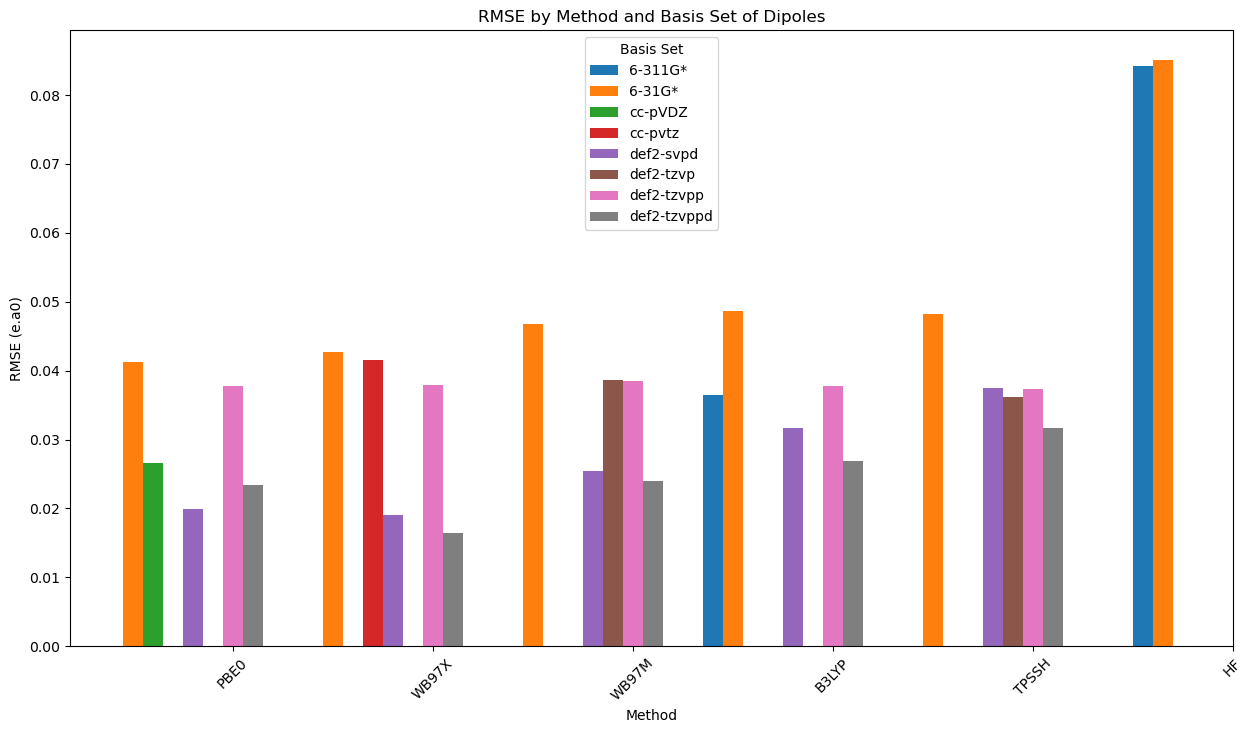

In [15]:
# Create a DataFrame from the list
df_rmse = rmse_dipoles


# Extract method and basis from the 'spec' key
df_rmse['method'] = df_rmse['spec'].apply(lambda x: x.split('-')[0].upper())  # Convert method to uppercase for consistency
df_rmse['basis'] = df_rmse['spec'].apply(lambda x: '-'.join(x.split('-')[-2:]))

# Calculate average RMSE for each method to determine the order
average_rmse_by_method = df_rmse.groupby('method')['rmse'].mean().sort_values()

# Sort the dataframe by the average RMSE of each method
df_rmse['method_avg_rmse'] = df_rmse['method'].map(average_rmse_by_method)
df_rmse_sorted = df_rmse.sort_values(by=['method_avg_rmse', 'method', 'basis'])
df_rmse_sorted.drop('method_avg_rmse', axis=1, inplace=True)
# Use a categorical type to ensure the methods are plotted in the sorted order
df_rmse_sorted['method'] = pd.Categorical(df_rmse_sorted['method'], categories=average_rmse_by_method.index, ordered=True)

# Normalize basis set labels
df_rmse_sorted['basis'] = df_rmse_sorted['basis'].replace({
    'cc-pVTZ': 'cc-pvtz',
    'gas-tzvp': 'def2-tzvp',
    'gas-tzvppd': 'def2-tzvppd'
})


# Creating a color map
unique_basis = df_rmse_sorted['basis'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_basis)))
color_map = dict(zip(unique_basis, colors))

# Creating the pivot table
pivot_table = df_rmse_sorted.pivot_table(index='method', columns='basis', values='rmse', aggfunc = 'mean')

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
bar_width = 0.1  # Adjust as necessary for the number of basis sets
group_width = np.max([np.sum(~pivot_table.loc[method].isna()) for method in pivot_table.index]) * bar_width

# Now, for each basis, we will calculate the exact position
for i, basis in enumerate(pivot_table.columns):
    # Create an offset array which positions each bar in the center of its group
    offsets = np.array([bar_width * (i - np.sum(~pivot_table.loc[method].isna())/2) for method in pivot_table.index])
    # Calculate the actual positions for each bar
    positions = np.arange(len(pivot_table.index)) + offsets
    # Plot the bars
    ax.bar(positions, pivot_table[basis], width=bar_width, label=basis)


# Set the position of the x-axis ticks and labels
ax.set_xticks(np.arange(len(pivot_table)) + bar_width / 2 * (len(pivot_table.columns) - 1))
ax.set_xticklabels(pivot_table.index, rotation=45)

# Adding labels and legend
ax.set_xlabel('Method')
ax.set_ylabel('RMSE (e.a0)')
ax.set_title('RMSE by Method and Basis Set of Dipoles')
ax.legend(title='Basis Set')

plt.show()

In [16]:

df_prepared = df[['specification','molecule','basis','dipole','charges']]

pivot_df = df_prepared.pivot_table(index=['molecule'], 
                                   columns='specification', 
                                   values='charges',
                                   aggfunc=lambda x: x.iloc[0] if not x.empty else None).reset_index()

pivot_df
pivot_df.to_csv('charge_results.csv')

In [17]:
pivot_df

specification,molecule,B3LYP-ddx-4-def2-svpd,B3LYP-ddx-4-def2-tzvpp,B3LYP-ddx-4-def2-tzvppd,B3LYP-ddx-78.4-def2-svpd,B3LYP-ddx-78.4-def2-tzvpp,B3LYP-ddx-78.4-def2-tzvppd,B3LYP-def2-tzvppd-ddx-4,B3LYP-def2-tzvppd-ddx-78.4,B3LYP-gas-6-31G*,...,b3lyp-gas-6-311G*,ccsd-aug-cc-pVTZP,ccsd-gas-aug-cc-pvtz,dlpno-MP2-4-aug-cc-pvtz,dlpno-MP2-4-cc-pvtz,dlpno-MP2-78.4-aug-cc-pvtz,dlpno-MP2-78.4-cc-pvtz,dlpno-MP2-gas-aug-cc-pvtz,dlpno-MP2-gas-cc-pvtz,mp2-gas-6-311G*
0,B(O)(O)OCC,"[1.299153677150116, -0.9583411761846335, -0.92...","[1.3048349590548143, -0.959195360600619, -0.92...",NaN,"[1.3070471631810914, -0.9683870330291667, -0.9...","[1.3117079566682517, -0.9684300425955736, -0.9...",NaN,NaN,NaN,"[1.2623238550745872, -0.9180350136242738, -0.9...",...,"[1.2592268370742952, -0.9370360182183334, -0.9...","[1.3641891138817728, -0.9266954775511864, -0.9...","[1.5768176165768848, -1.0634181831262466, -1.0...",NaN,"[1.575231491878776, -1.070752063936674, -1.046...",NaN,"[1.581287351332564, -1.078673514341087, -1.054...","[1.5768705139487822, -1.0634443889721872, -1.0...","[1.5636288461178853, -1.0537358159375252, -1.0...","[1.5383127322331547, -1.054555911837274, -1.03..."
1,C1=CNC=C1Br,"[0.00432021766970246, -0.06683975116154352, -0...","[0.011391844222845891, -0.09162312003687355, -...","[0.01954919816801108, -0.08972083354164953, -0...","[-0.004664976280494861, -0.06709698214168033, ...","[0.0034049843060138204, -0.0923691597841497, -...","[0.011847792946555736, -0.09081311810673735, -...","[0.01954780019126351, -0.08971642000173298, -0...","[0.011846779217364996, -0.09080865255143017, -...","[-0.004335939142736291, -0.06707058261159349, ...",...,"[0.012537646292548655, -0.10650327852712539, -...","[0.005418927156373098, -0.07481957754116751, -...","[0.005948596115842248, -0.03856645553420816, -...",NaN,"[-0.022185804831691962, -0.03297819573901562, ...",NaN,"[-0.031839916633434315, -0.03200434807243272, ...","[0.005965431888297934, -0.03859396260126195, -...","[-0.01042685535615856, -0.034122259308146746, ...","[-0.007862344028417413, -0.05062312256548532, ..."
2,C1=CSC=C1,"[-0.13160995449594226, -0.22520664922179265, 0...","[-0.13749856015229714, -0.24477883577632442, 0...",NaN,"[-0.1361709236965755, -0.22929305543995143, 0....","[-0.142777860887592, -0.24905748495029603, 0.0...","[2.1893412591256056, 3.352510089621123, -2.010...",NaN,"[2.1893336505042793, 3.3525145630357063, -2.01...","[-0.12817504802293042, -0.23328426008697653, 0...",...,"[-0.14052328699850083, -0.25434291157352107, 0...",NaN,"[-0.13459345132099623, -0.2364594699526385, 0....",NaN,"[-0.1404618570865626, -0.24020119825930383, 0....",NaN,"[-0.14464539456543385, -0.2445843846932231, 0....","[-0.13461107554413893, -0.23645987275593153, 0...","[-0.13411537842011304, -0.23488493794513773, 0...","[-0.14342428259004414, -0.2422310029482076, 0...."
3,C1=CSN=C1[O-],"[0.8255989308527494, -0.7158033101181392, -0.0...","[0.8030940912700489, -0.7215173327889842, 0.02...","[0.8487889605195652, -0.7262342637608795, -0.0...","[0.8322911915995633, -0.7574465288250258, 0.02...","[0.8067104767182234, -0.7583687475747265, 0.04...","[1.8451408284253412, 3.420674820791233, -8.227...","[0.8487862296288887, -0.726236531404151, -0.00...",NaN,"[0.7057620432256542, -0.6573188654312285, -0.0...",...,"[0.7352259375502129, -0.6582134380671845, -0.0...",NaN,"[0.9666646866986603, -0.7537987121449552, -0.0...",NaN,"[0.9402305546381498, -0.8094386845217055, 0.00...",NaN,"[0.9435692141002173, -0.8426259255105505, 0.02...","[0.9666651184377493, -0.7538070896663989, -0.0...","[0.9255516773855886, -0.7555836839849206, -0.0...","[0.9152502048629605, -0.7697769397797191, -0.0..."
4,C1=C[NH+]=CN1,"[0.3005234174051517, -0.3316076772175191, -0.0...","[0.27663988471175094, -0.3229309893253678, -0....","[0.2798716395745258, -0.32657457718564853, -0....","[0.30520388397823967, -0.3287368554314157, -0....","[0.28143834122967626, -0.32038316061983435, -0...","[0.2841565921003466, -0.3232674150354614, -0.0...","[0.2798

In [18]:

df_wall_time = df[['specification','molecule','basis','dipole','charges','wall time']]

pivot_df_wall_time = df_wall_time.pivot_table(index=['molecule'], 
                                   columns='specification', 
                                   values='wall time',
                                   aggfunc=lambda x: x.iloc[0] if not x.empty else None).reset_index()

pivot_df_wall_time


specification,molecule,B3LYP-ddx-4-def2-svpd,B3LYP-ddx-4-def2-tzvpp,B3LYP-ddx-4-def2-tzvppd,B3LYP-ddx-78.4-def2-svpd,B3LYP-ddx-78.4-def2-tzvpp,B3LYP-ddx-78.4-def2-tzvppd,B3LYP-def2-tzvppd-ddx-4,B3LYP-def2-tzvppd-ddx-78.4,B3LYP-gas-6-31G*,...,WB97X-D-gas-def2-tzvppd,b3lyp-gas-6-311G*,ccsd-gas-aug-cc-pvtz,dlpno-MP2-4-aug-cc-pvtz,dlpno-MP2-4-cc-pvtz,dlpno-MP2-78.4-aug-cc-pvtz,dlpno-MP2-78.4-cc-pvtz,dlpno-MP2-gas-aug-cc-pvtz,dlpno-MP2-gas-cc-pvtz,mp2-gas-6-311G*
0,B(O)(O)OCC,46.272475,54.811363,NaN,42.776683,44.208980,NaN,NaN,NaN,19.892967,...,36.552833,12.025784,9593.492622,NaN,40.001533,NaN,40.939784,41.812669,28.424242,11.261585
1,C1=CNC=C1Br,25.541912,105.318451,58.855125,24.594666,34.028307,68.891677,34.286313,35.100964,19.419000,...,31.809647,11.530361,10659.247658,NaN,71.942285,NaN,68.458815,82.641031,33.609338,11.904195
2,C1=CSC=C1,21.644610,21.925171,NaN,18.671836,21.416532,59.012946,NaN,46.806906,13.486184,...,16.463563,6.886709,2563.326073,NaN,24.708131,NaN,24.523015,21.165962,14.923101,8.286558
3,C1=CSN=C1[O-],19.532701,33.503730,43.640054,18.226536,32.647760,194.153312,25.541336,NaN,14.029539,...,21.905900,7.033719,3692.158620,NaN,36.378104,NaN,36.192502,27.318464,20.128791,6.692683
4,C1=C[NH+]=CN1,18.536264,23.629795,36.891860,18.419228,26.124871,45.122129,21.909665,21.876673,13.237766,...,16.327489,7.302707,2767.350769,NaN,26.901895,NaN,29.610198,33.518258,15.127469,7.134130
5,C1CC(=O)NC1,34.069830,61.778204,85.759509,33.791094,61.054013,NaN,46.052115,NaN,20.966789,...,30.048509,11.669137,8836.624877,NaN,49.805002,NaN,50.351797,41.705524,26.133660,11.019750
6,C1CCNC1,32.375528,45.550557,75.261583,33.417122,64.407474,53.174525,42.464881,41.870033,19.674762,...,35.092795,11.909126,8578.947248,NaN,39.128155,NaN,39.369054,37.903171,24.425790,10.702129
7,C1CCOC1,102.300984,176.697901,71.729881,28.117978,39.075328,47.370861,37.356709,36.300934,18.594832,...,34.613557,10.418178,6547.545196,NaN,46.444854,NaN,40.637051,48.040754,22.071818,10.172349
8,C1CC[NH2+]CC1,62.852818,94.876808,144.998006,56.471966,80.604158,153.491239,76.685603,75.511351,30.784117,...,53.504798,20.716328,36915.074115,NaN,73.395875,NaN,78.444048,84.331125,48.404758,18.934284
9,CC,9.204762,11.498911,17.732759,12.290980,16.354637,12.422946,10.493214,10.535651,7.102179,...,9.213535,4.773260,420.083043,31.911397,13.154176,NaN,12.684822,9.115943,7.181671,4.693646


In [19]:
pivot_df.to_csv('pivot_charges.csv')

In [20]:
pivot_df['molecule'][0]

'B(O)(O)OCC'

In [21]:
pivot_df.columns

Index(['molecule', 'B3LYP-ddx-4-def2-svpd', 'B3LYP-ddx-4-def2-tzvpp',
       'B3LYP-ddx-4-def2-tzvppd', 'B3LYP-ddx-78.4-def2-svpd',
       'B3LYP-ddx-78.4-def2-tzvpp', 'B3LYP-ddx-78.4-def2-tzvppd',
       'B3LYP-def2-tzvppd-ddx-4', 'B3LYP-def2-tzvppd-ddx-78.4',
       'B3LYP-gas-6-31G*', 'B3LYP-gas-def2-svpd', 'B3LYP-gas-def2-tzvpp',
       'B3LYP-gas-def2-tzvppd', 'HF-6-31G*', 'HF-gas-6-311G*',
       'MP2-4-aug-cc-pvtz', 'MP2-4-cc-pvtz', 'MP2-78.4-aug-cc-pvtz',
       'MP2-78.4-cc-pvtz', 'MP2-gas-aug-cc-pvtz', 'MP2-gas-cc-pvtz',
       'PBE0-ddx-4-def2-svpd', 'PBE0-ddx-4-def2-tzvpp',
       'PBE0-ddx-4-def2-tzvppd', 'PBE0-ddx-78.4-def2-svpd',
       'PBE0-ddx-78.4-def2-tzvpp', 'PBE0-ddx-78.4-def2-tzvppd',
       'PBE0-def2-tzvppd-ddx-4', 'PBE0-def2-tzvppd-ddx-78.4',
       'PBE0-gas-6-31G*', 'PBE0-gas-aug-cc-pVDZ', 'PBE0-gas-def2-svpd',
       'PBE0-gas-def2-tzvpp', 'PBE0-gas-def2-tzvppd', 'TPSSH-ddx-4-def2-svpd',
       'TPSSH-ddx-4-def2-tzvpp', 'TPSSH-ddx-4-def2-tzvppd',
       'TP

['B3LYP-gas-6-31G*', 'B3LYP-gas-def2-svpd', 'B3LYP-gas-def2-tzvpp', 'B3LYP-gas-def2-tzvppd', 'HF-gas-6-311G*', 'MP2-gas-aug-cc-pvtz', 'MP2-gas-cc-pvtz', 'PBE0-gas-6-31G*', 'PBE0-gas-aug-cc-pVDZ', 'PBE0-gas-def2-svpd', 'PBE0-gas-def2-tzvpp', 'PBE0-gas-def2-tzvppd', 'TPSSH-gas-6-31G*', 'TPSSH-gas-def2-svpd', 'TPSSH-gas-def2-tzvpp', 'TPSSH-gas-def2-tzvppd', 'TPSSH-gas-tzvp', 'WB97M-D3BJ-gas-6-31G*', 'WB97M-D3BJ-gas-def2-svpd', 'WB97M-D3BJ-gas-def2-tzvp', 'WB97M-D3BJ-gas-def2-tzvpp', 'WB97M-D3BJ-gas-def2-tzvppd', 'WB97M-D3BJ-gas-tzvppd', 'WB97X-D-gas-6-31G*', 'WB97X-D-gas-cc-pVTZ', 'WB97X-D-gas-def2-svpd', 'WB97X-D-gas-def2-tzvpp', 'WB97X-D-gas-def2-tzvppd', 'b3lyp-gas-6-311G*', 'ccsd-gas-aug-cc-pvtz', 'dlpno-MP2-gas-aug-cc-pvtz', 'dlpno-MP2-gas-cc-pvtz', 'mp2-gas-6-311G*', 'HF-6-31G*']
ccsd-gas-aug-cc-pvtz
dlpno-MP2-4-aug-cc-pvtz
dlpno-MP2-4-cc-pvtz
dlpno-MP2-78.4-aug-cc-pvtz
dlpno-MP2-78.4-cc-pvtz
dlpno-MP2-gas-aug-cc-pvtz
dlpno-MP2-gas-cc-pvtz
mp2-gas-6-311G*
MP2-4-aug-cc-pvtz
MP2-4-cc-

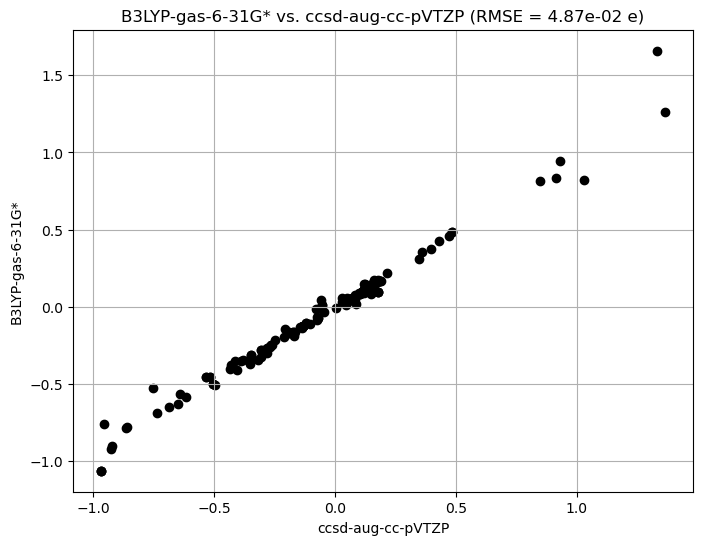

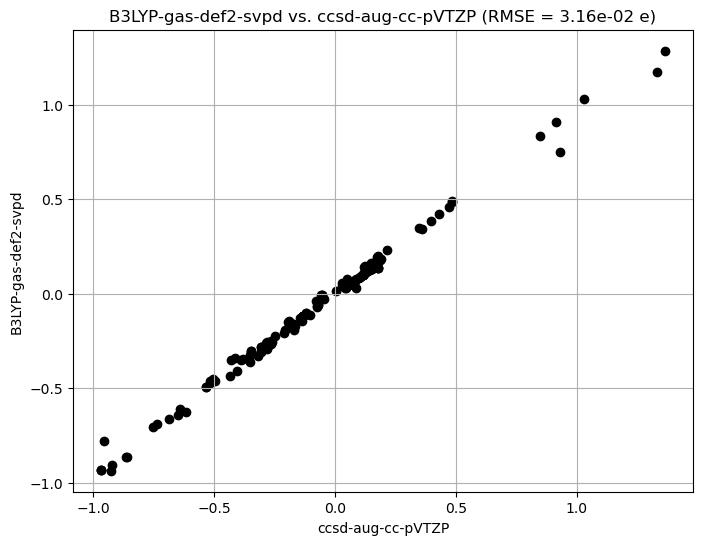

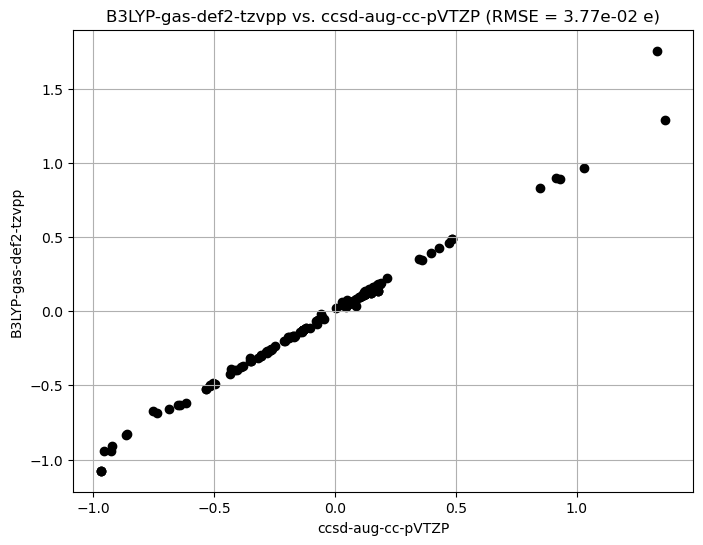

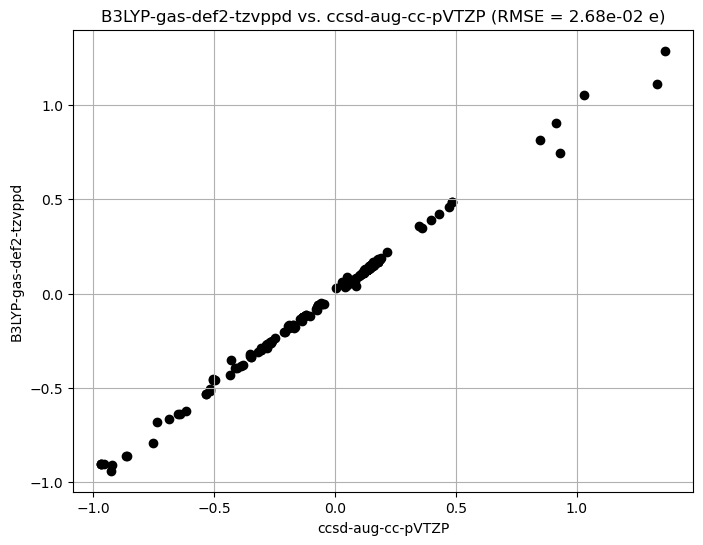

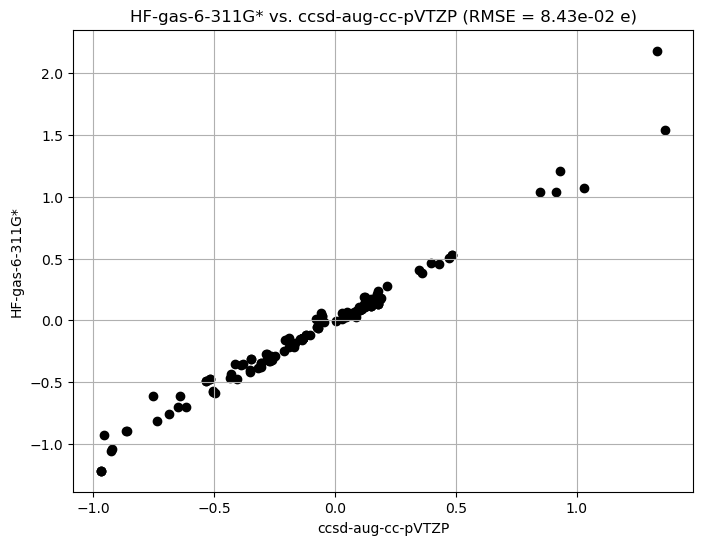

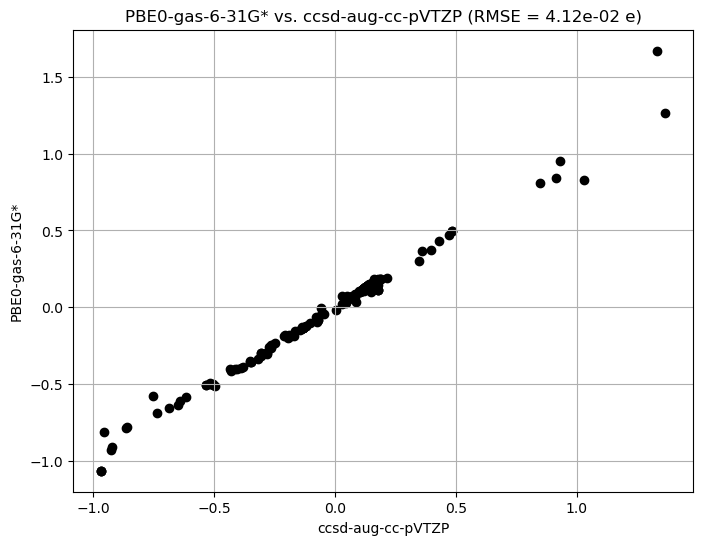

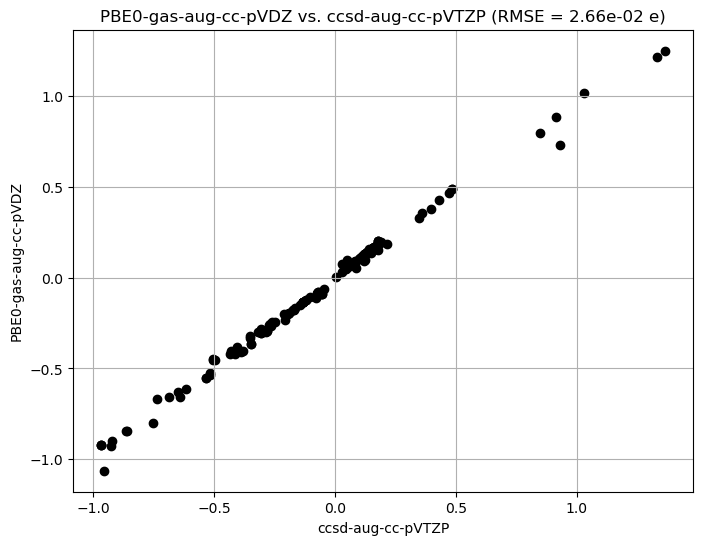

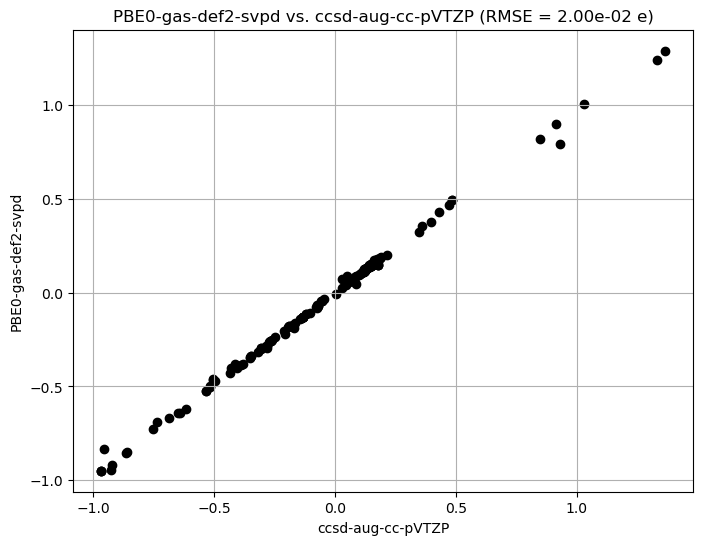

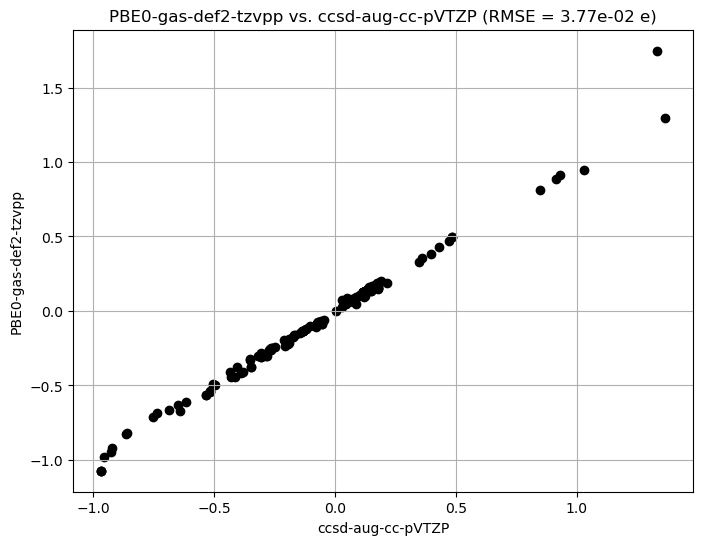

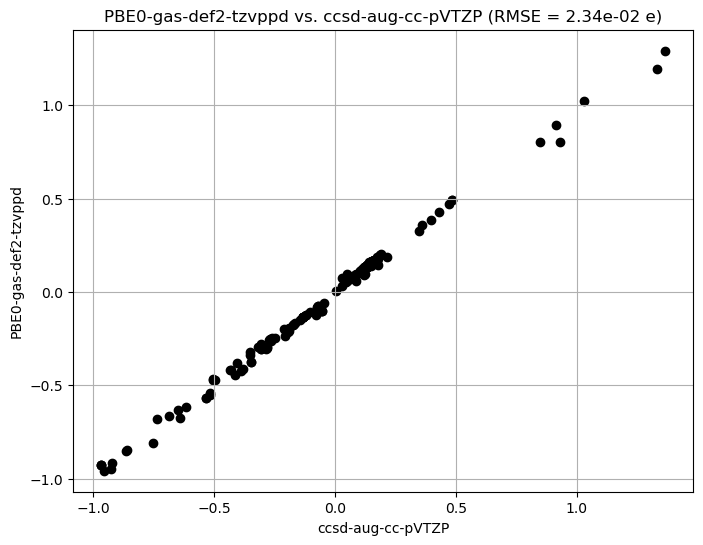

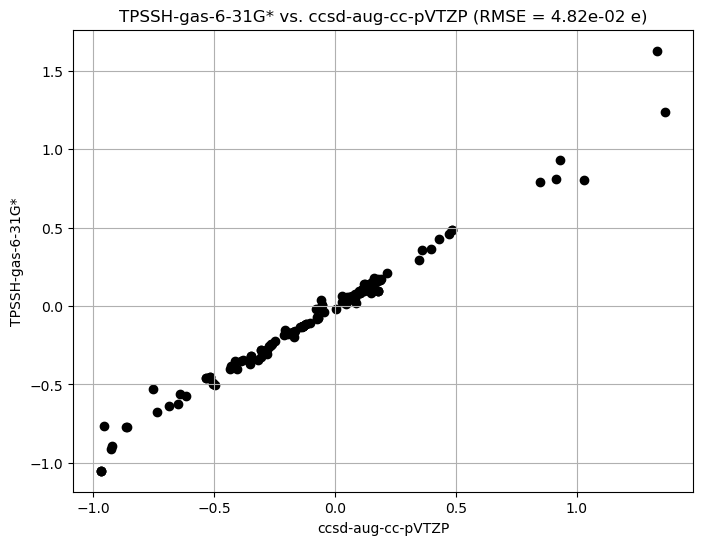

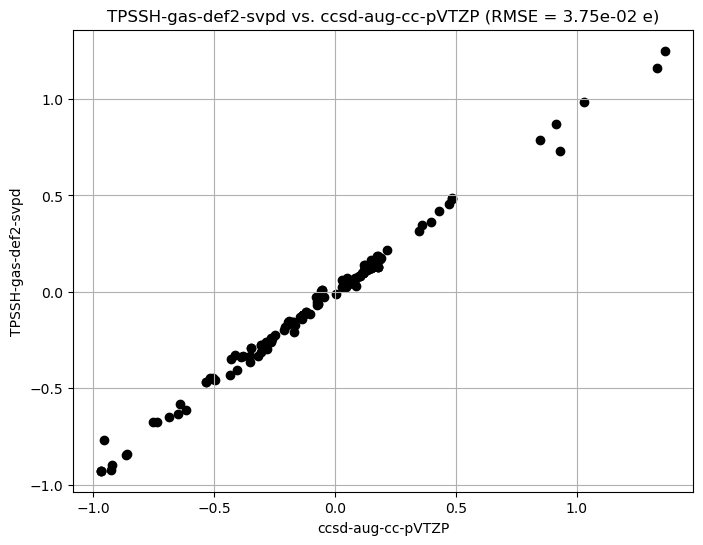

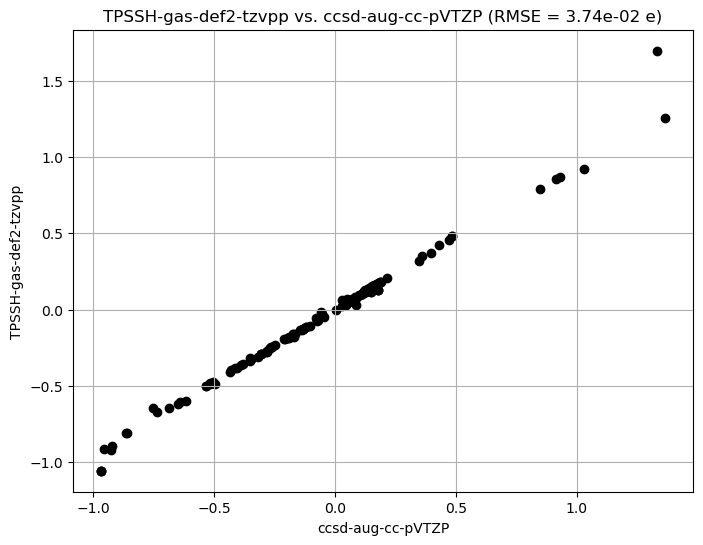

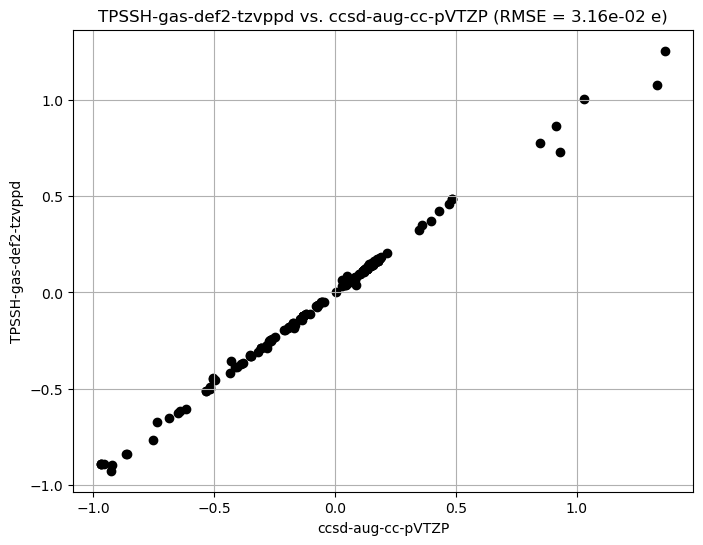

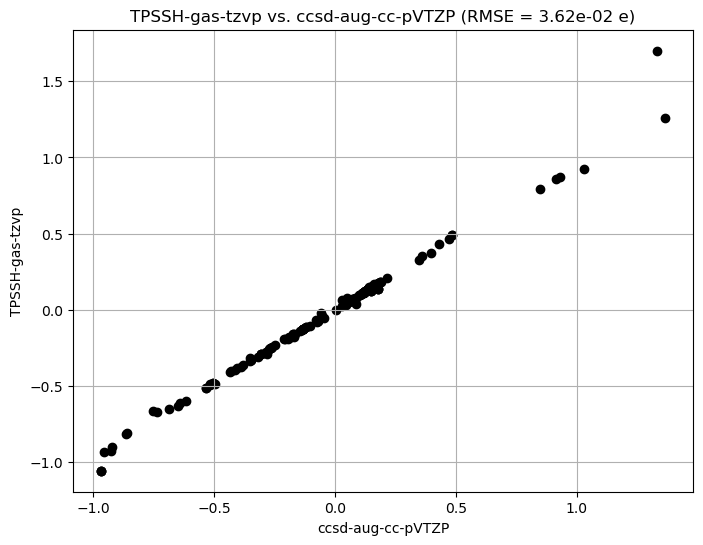

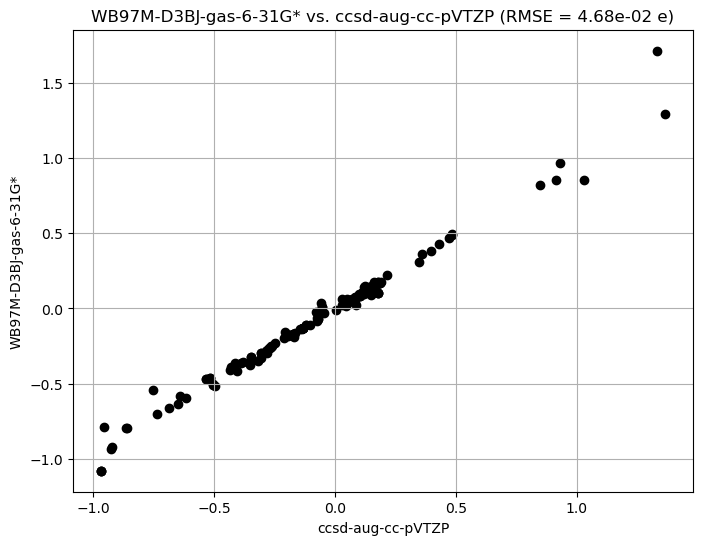

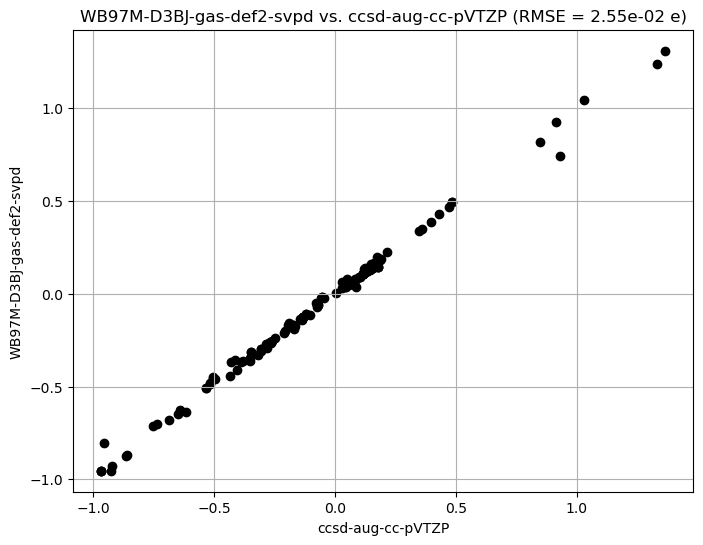

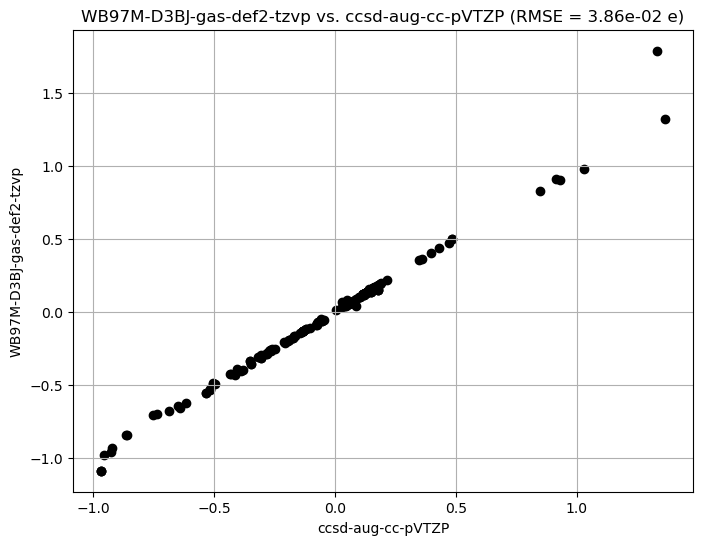

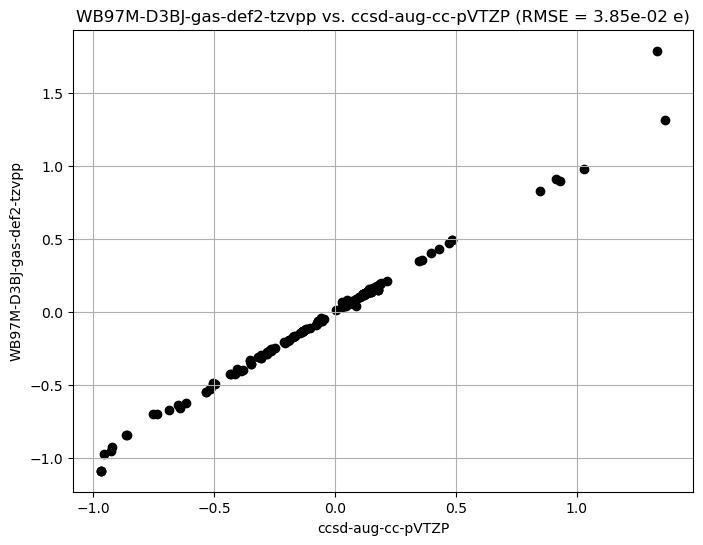

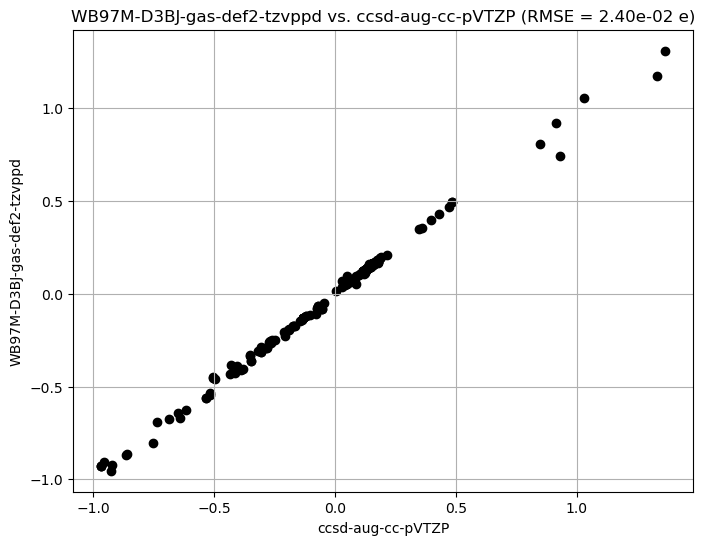

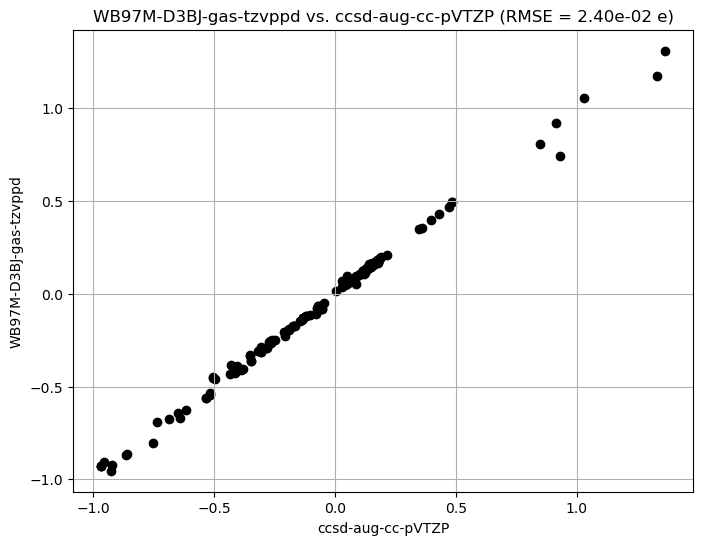

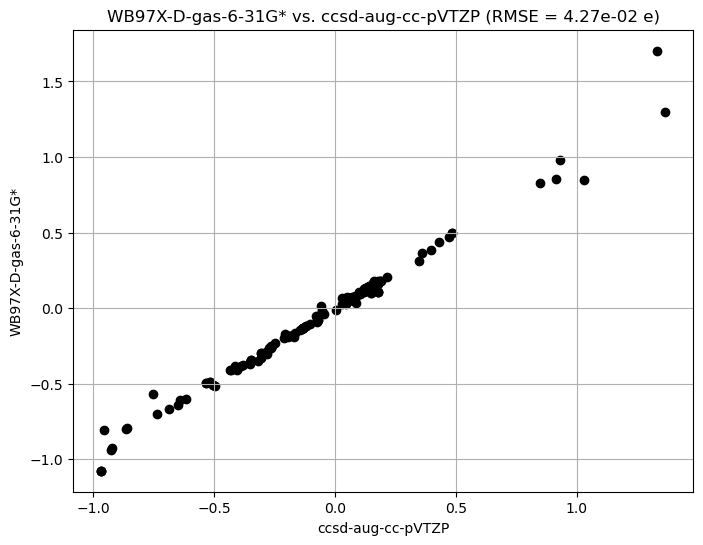

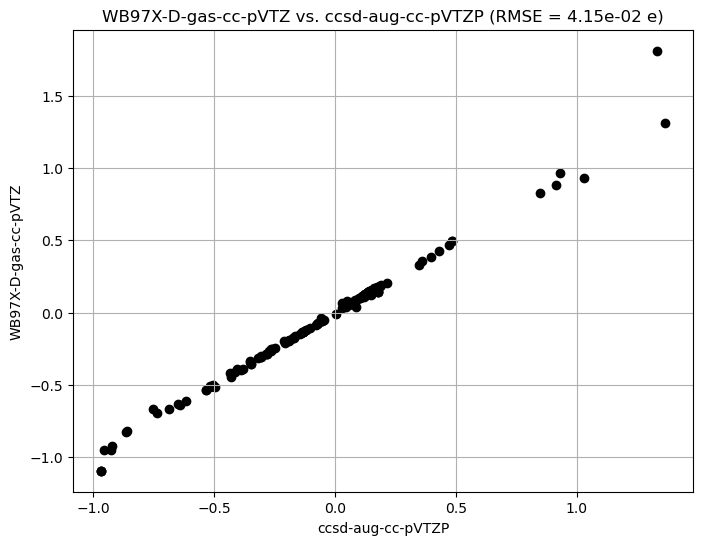

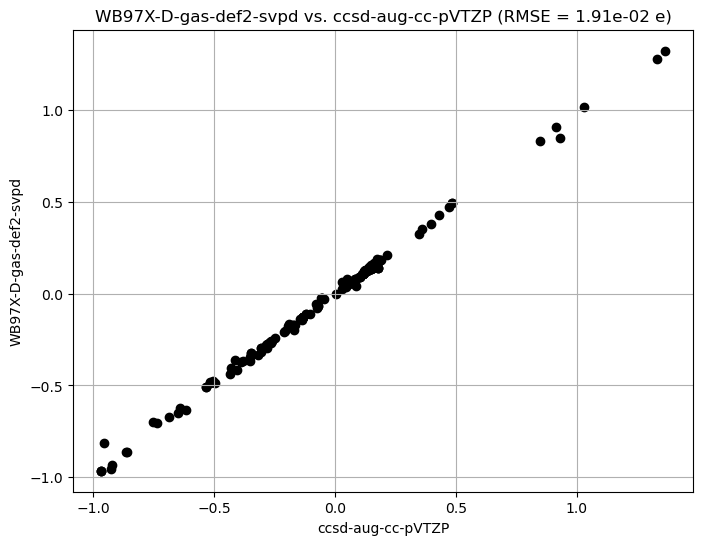

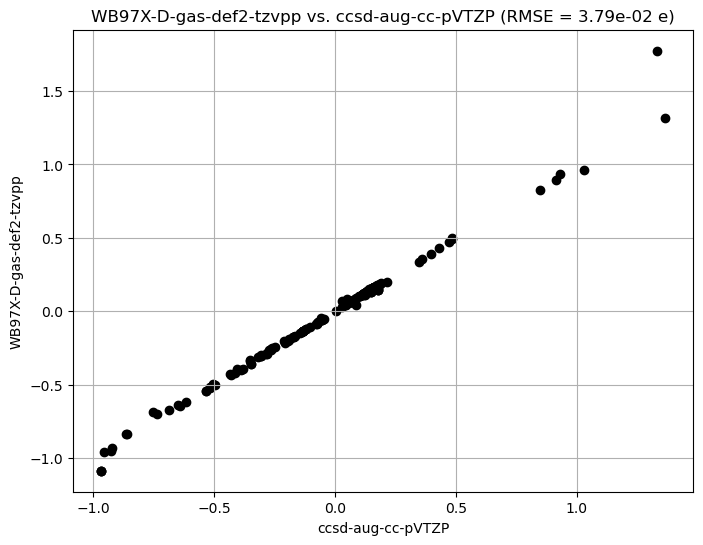

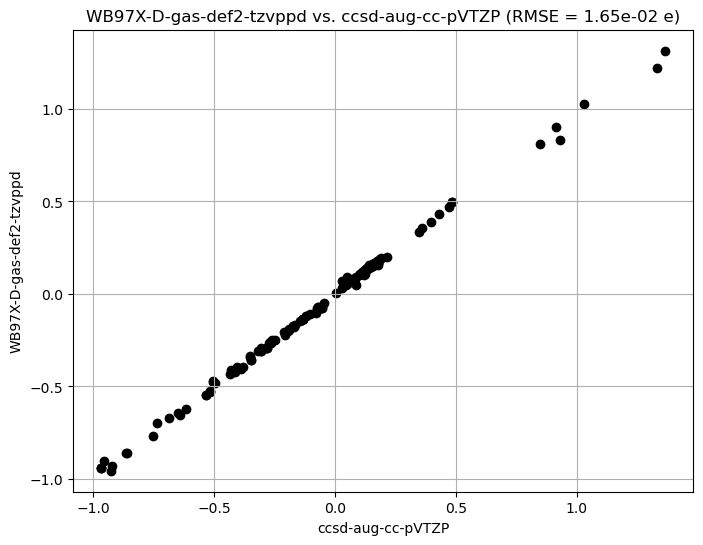

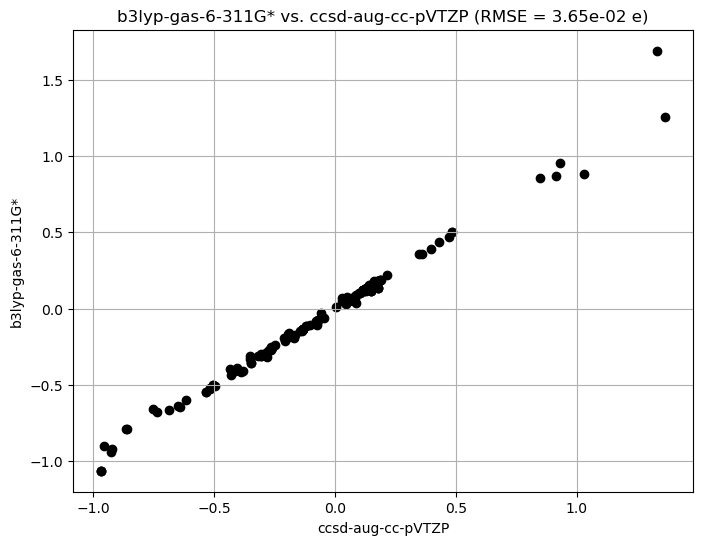

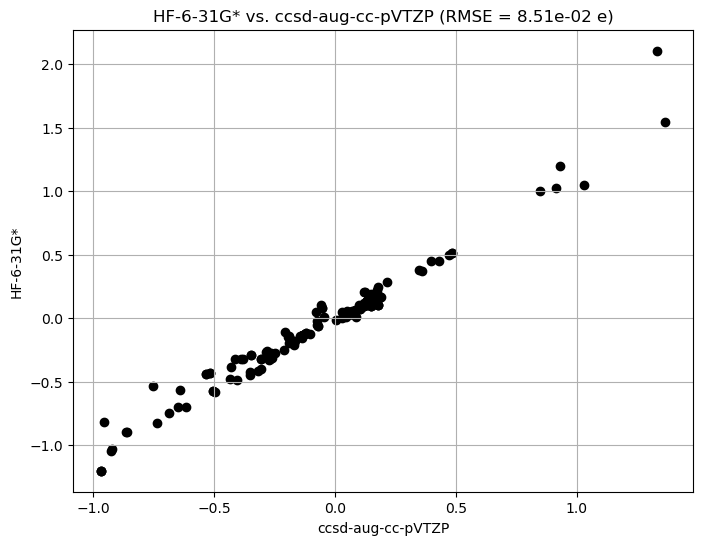

In [22]:
from sklearn.metrics import mean_squared_error

# Step 1: Filter columns
# Exclude the first four columns and select only those with 'NoSolvent_nan' but not the target column itself
columns_to_plot = [col for col in pivot_df.columns if 'gas' in col and col not in ['BaseExceptionGroupspecification','molecule','basis']]
columns_to_plot.append('HF-6-31G*')
print(columns_to_plot)

remove_items = ['ccsd-gas-aug-cc-pvtz', 'dlpno-MP2-4-aug-cc-pvtz',
       'dlpno-MP2-4-cc-pvtz', 'dlpno-MP2-78.4-aug-cc-pvtz',
       'dlpno-MP2-78.4-cc-pvtz', 'dlpno-MP2-gas-aug-cc-pvtz',
       'dlpno-MP2-gas-cc-pvtz', 'mp2-gas-6-311G*','MP2-4-aug-cc-pvtz', 'MP2-4-cc-pvtz',
       'MP2-78.4-aug-cc-pvtz', 'MP2-78.4-cc-pvtz', 'MP2-gas-aug-cc-pvtz',
       'MP2-gas-cc-pvtz']

for item in remove_items:
    print(item)
    try:
        columns_to_plot.remove(item)
    except ValueError:
        continue

print(columns_to_plot)
# The target column for comparison
target_column = 'ccsd-aug-cc-pVTZP'

rmses = []
# df_rmse = pd.DataFrame(['spec','rmse'])
# Step 2: Plotting
# Loop through the selected columns and plot them against the target column
molecule_rmses = []
for col in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    clean_df = pivot_df[[target_column, col, 'molecule']].dropna()
    pivot_df_filter = pivot_df.filter(items = [target_column, col])
    pivot_df_wall_time_filter = pivot_df_wall_time.filter(items = [col])
    col_x = target_column
    x_tot = []
    y_tot = []
    w_time_tot = []
    for (index, row), (index_wt, row_wt) in zip(pivot_df_filter.iterrows(), pivot_df_wall_time_filter.iterrows()):
        x_values = row[col_x]
        if isinstance(x_values, np.ndarray):
                x_values = x_values.tolist()
                y_values = ast.literal_eval(row[col])
                x_tot.extend(x_values)
                y_tot.extend(y_values)
                if 'ccsd' not in col:
                  w_time_tot.append(row_wt[col])
                # Check if y_values is a list and has the same length as x_values
                if isinstance(y_values, list) and len(x_values) == len(y_values):
                    plt.scatter(x_values, y_values, color='black')  # Use the color assigned to this column
                    rmse_molecule = np.sqrt(mean_squared_error(y_values, x_values))
                    information_molecule = {"molecule":clean_df['molecule'][index],
                                # "spec": spec,
                                "rmse": rmse_molecule
                                }
                    molecule_rmses.append(information_molecule)
    # print(len(x_tot))
    if len(x_tot) == 0:
         continue
    rmse = np.sqrt(mean_squared_error(x_tot, y_tot))
    wall_tm_mean = np.mean(w_time_tot)
    information = {"rmse": rmse,
                   "spec": col,
                   "wall time": wall_tm_mean}
    

    rmses.append(information)

    plt.title(f'{col} vs. {target_column} (RMSE = {rmse:.2e} e)')        
    plt.xlabel(target_column)
    plt.ylabel(col)
    # Plotting details
    plt.grid(True)  # Optional: Add a grid for better readability
    plt.show()
df_dft_rmse = pd.DataFrame(rmses)
df_molecules_rmse  = pd.DataFrame(molecule_rmses)



In [23]:
df_dft_rmse

,rmse,spec,wall time
0,0.048710,B3LYP-gas-6-31G*,15.066817
1,0.031627,B3LYP-gas-def2-svpd,19.816829
2,0.037734,B3LYP-gas-def2-tzvpp,24.717656
3,0.026848,B3LYP-gas-def2-tzvppd,23.047051
4,0.084273,HF-gas-6-311G*,7.603842
5,0.041197,PBE0-gas-6-31G*,15.287539
6,0.026633,PBE0-gas-aug-cc-pVDZ,12.249735
7,0.019980,PBE0-gas-def2-svpd,22.067936
8,0.037695,PBE0-gas-def2-tzvpp,23.048892
9,0.023356,PBE0-gas-def2-tzvppd,22.755132


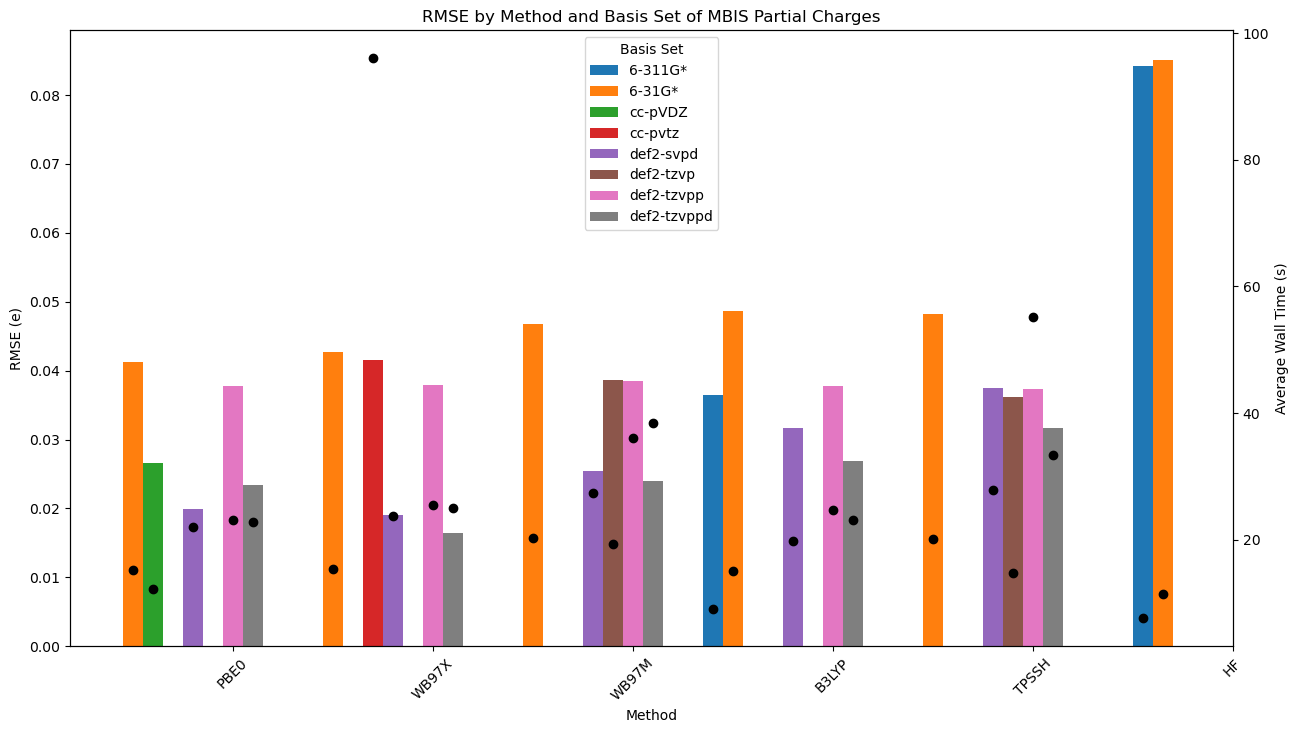

In [24]:
# Create a DataFrame from the list
df_rmse = df_dft_rmse


# Extract method and basis from the 'spec' key
df_rmse['method'] = df_rmse['spec'].apply(lambda x: x.split('-')[0].upper())  # Convert method to uppercase for consistency
df_rmse['basis'] = df_rmse['spec'].apply(lambda x: '-'.join(x.split('-')[-2:]))

# Calculate average RMSE for each method to determine the order
average_rmse_by_method = df_rmse.groupby('method')['rmse'].mean().sort_values()

# Sort the dataframe by the average RMSE of each method
df_rmse['method_avg_rmse'] = df_rmse['method'].map(average_rmse_by_method)
df_rmse_sorted = df_rmse.sort_values(by=['method_avg_rmse', 'method', 'basis'])
df_rmse_sorted.drop('method_avg_rmse', axis=1, inplace=True)
# Use a categorical type to ensure the methods are plotted in the sorted order
df_rmse_sorted['method'] = pd.Categorical(df_rmse_sorted['method'], categories=average_rmse_by_method.index, ordered=True)

# Normalize basis set labels
df_rmse_sorted['basis'] = df_rmse_sorted['basis'].replace({
    'cc-pVTZ': 'cc-pvtz',
    'gas-tzvp': 'def2-tzvp',
    'gas-tzvppd': 'def2-tzvppd'
})


# Creating a color map
unique_basis = df_rmse_sorted['basis'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_basis)))
color_map = dict(zip(unique_basis, colors))

# Creating the pivot table
pivot_table = df_rmse_sorted.pivot_table(index='method', columns='basis', values='rmse', aggfunc = 'mean')
pivot_table_wall = df_rmse_sorted.pivot_table(index='method', columns='basis', values='wall time', aggfunc = 'mean')

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
bar_width = 0.1  # Adjust as necessary for the number of basis sets
group_width = np.max([np.sum(~pivot_table.loc[method].isna()) for method in pivot_table.index]) * bar_width
ax2 = ax.twinx()

# Now, for each basis, we will calculate the exact position
for i, basis in enumerate(pivot_table.columns):
    # Create an offset array which positions each bar in the center of its group
    offsets = np.array([bar_width * (i - np.sum(~pivot_table.loc[method].isna())/2) for method in pivot_table.index])
    # Calculate the actual positions for each bar
    positions = np.arange(len(pivot_table.index)) + offsets
    # Plot the bars
    ax.bar(positions, pivot_table[basis], width=bar_width, label=basis)
    ax2.scatter(positions, pivot_table_wall[basis],  label=basis, color = 'black')



# Set the position of the x-axis ticks and labels
ax.set_xticks(np.arange(len(pivot_table)) + bar_width / 2 * (len(pivot_table.columns) - 1))
ax.set_xticklabels(pivot_table.index, rotation=45)

# Adding labels and legend
ax.set_xlabel('Method')
ax.set_ylabel('RMSE (e)')
ax2.set_ylabel('Average Wall Time (s)')
ax.set_title('RMSE by Method and Basis Set of MBIS Partial Charges')
ax.legend(title='Basis Set')

plt.show()

In [40]:
df_prepared = df[['specification','molecule','basis','dipole','charges']]

pivot_df_dipole = df_prepared.pivot_table(index=['molecule'], 
                                   columns='specification', 
                                   values='dipole',
                                   aggfunc=lambda x: x.iloc[0] if not x.empty else None).reset_index()
pivot_df_dipole

specification,molecule,B3LYP-ddx-4-def2-svpd,B3LYP-ddx-4-def2-tzvpp,B3LYP-ddx-4-def2-tzvppd,B3LYP-ddx-78.4-def2-svpd,B3LYP-ddx-78.4-def2-tzvpp,B3LYP-ddx-78.4-def2-tzvppd,B3LYP-def2-tzvppd-ddx-4,B3LYP-def2-tzvppd-ddx-78.4,B3LYP-gas-6-31G*,...,b3lyp-gas-6-311G*,ccsd-aug-cc-pVTZP,ccsd-gas-aug-cc-pvtz,dlpno-MP2-4-aug-cc-pvtz,dlpno-MP2-4-cc-pvtz,dlpno-MP2-78.4-aug-cc-pvtz,dlpno-MP2-78.4-cc-pvtz,dlpno-MP2-gas-aug-cc-pvtz,dlpno-MP2-gas-cc-pvtz,mp2-gas-6-311G*
0,B(O)(O)OCC,"[-0.19012242440761895, -0.0073349076296178595,...","[-0.15628327023001987, -0.022716245131489288, ...",NaN,"[-0.20737224913767704, -0.005190133216522952, ...","[-0.17202309455186082, -0.021855367930756486, ...",NaN,NaN,NaN,"[-0.062387580600528736, -0.06497536327848863, ...",...,"[-0.05670580194215091, -0.07725184008739738, 0...","[-1.267229438475674, -0.15932050352735438, 0.1...","[-0.1506131065491516, -0.010811811490446743, 0...",NaN,"[-0.15605742674875245, -0.014039421264042673, ...",NaN,"[-0.16961286043945734, -0.012309969176003577, ...","[-0.15061995278931306, -0.01080052492596728, 0...","[-0.13009128331921005, -0.019282765319914574, ...","[-0.09731434862648314, -0.058089542178366926, ..."
1,C1=CNC=C1Br,"[-1.4534097834241209, -0.7222612025170356, -0....","[-1.447031584267279, -0.7229171730339274, -0.1...","[-1.4396284462015956, -0.7141950427066952, -0....","[-1.5791704805789948, -0.8025630946285318, -0....","[-1.5683421650391836, -0.8004481537433428, -0....","[-1.5653195323961313, -0.7953379982585034, -0....","[-1.439651403862058, -0.7141904295159414, -0.1...","[-1.5653444108575911, -0.795331643394686, -0.1...","[-1.2681311067782133, -0.6138991603732258, -0....",...,"[-1.250997584289621, -0.6269607283728895, -0.1...","[-1.2439415147574948, -0.4738266555722772, 0.0...","[-1.2907825390502126, -0.6178456785875142, -0....",NaN,"[-1.543697718255089, -0.7528985323455863, -0.1...",NaN,"[-1.663595267674225, -0.8300286690068681, -0.1...","[-1.290765223861655, -0.617834408290804, -0.14...","[-1.314188683504284, -0.6274619973619124, -0.1...","[-1.3416957655052215, -0.65206186111525, -0.14..."
2,C1=CSC=C1,"[-0.001628414685781454, -0.27891985036941236, ...","[-0.0009703733298329631, -0.24476087216648068,...",NaN,"[-0.001967519843672161, -0.3002561950350895, 0...","[-0.0014660616235881996, -0.26006915084325044,...","[-32.389092720493245, -42.90008069461597, -3.7...",NaN,"[-32.38893116610354, -42.900145190370004, -3.7...","[-0.0014139588348673904, -0.2580589648355769, ...",...,"[-0.001236046064678975, -0.23960597800886774, ...",NaN,"[-0.001814935831092046, -0.32658452944497895, ...",NaN,"[-0.0018959497225847777, -0.3851743281277322, ...",NaN,"[-0.0024163224902005176, -0.41502557601707224,...","[-0.0018154634343591214, -0.32669091654943827,...","[-0.001786707902188489, -0.3232604753189534, 0...","[-0.0018643129049242813, -0.33785082637714225,..."
3,C1=CSN=C1[O-],"[3.305862364148382, -0.8558372315690619, -0.20...","[3.1852648368774226, -0.8351293558378785, -0.2...","[3.2929422841103744, -0.8821577352912868, -0.2...","[3.662747357253437, -0.8651777407645938, -0.18...","[3.505748774472881, -0.8462157074187147, -0.19...","[-31.521115142349018, -23.22722578348204, -13....","[3.292944248317365, -0.8821371773957836, -0.22...",NaN,"[2.5744534169543876, -0.8760900088432138, -0.2...",...,"[2.59918852459581, -0.8895639912740378, -0.269...",NaN,"[2.90817406651416, -0.9825159353782382, -0.294...",NaN,"[3.3992108157573675, -1.0070266275547013, -0.2...",NaN,"[3.693727383183816, -1.0299843322462507, -0.26...","[2.9083275820036967, -0.9826287525911326, -0.2...","[2.892617728927206, -0.9517499346194995, -0.28...","[2.9739280587442884, -1.011260053198825, -0.30..."
4,C1=C[NH+]=CN1,"[-0.35124872858221634, -0.5886168760343935, 0....","[-0.35059783774124753, -0.5873781004990928, 0....","[-0.3468705160186669, -0.5810647785879777, 0.3...","[-0.3862526514864668, -0.6487598062668836, 0.3...","[-0.3844983348444444, -0.6455811476059994, 0.3...","[-0.3822543828053355, -0.6416781471105395, 0.3...","[-0.346

In [88]:
df_rmse

,rmse,spec,wall time,method,basis,method_avg_rmse
0,0.048710,B3LYP-gas-6-31G*,15.066817,B3LYP,6-31G*,0.036289
1,0.031627,B3LYP-gas-def2-svpd,19.816829,B3LYP,def2-svpd,0.036289
2,0.037734,B3LYP-gas-def2-tzvpp,24.717656,B3LYP,def2-tzvpp,0.036289
3,0.026848,B3LYP-gas-def2-tzvppd,23.047051,B3LYP,def2-tzvppd,0.036289
4,0.084273,HF-gas-6-311G*,7.603842,HF,6-311G*,0.084703
5,0.041197,PBE0-gas-6-31G*,15.287539,PBE0,6-31G*,0.029772
6,0.026633,PBE0-gas-aug-cc-pVDZ,12.249735,PBE0,cc-pVDZ,0.029772
7,0.019980,PBE0-gas-def2-svpd,22.067936,PBE0,def2-svpd,0.029772
8,0.037695,PBE0-gas-def2-tzvpp,23.048892,PBE0,def2-tzvpp,0.029772
9,0.023356,PBE0-gas-def2-tzvppd,22.755132,PBE0,def2-tzvppd,0.029772


In [89]:
pivot_df_dipole['molecule'].unique()

array(['B(O)(O)OCC', 'C1=CNC=C1Br', 'C1=CSC=C1', 'C1=CSN=C1[O-]',
       'C1=C[NH+]=CN1', 'C1CC(=O)NC1', 'C1CCNC1', 'C1CCOC1',
       'C1CC[NH2+]CC1', 'CC', 'CC(=O)C', 'CC(=O)O', 'CC(=O)[O-]',
       'CC(C)F', 'CC1=CNc2c1cccc2', 'CCO', 'CCS', 'CCSC', 'COC',
       'COCC(F)(F)F', 'CO[Si](C)(C)O', 'CP(=O)([O-])[O-]',
       'CS(=O)(=O)[O-]', 'C[Si]1(CCCC1)C', '[B-](COC)(F)(F)F',
       'c1cc(c(c(c1)F)F)F', 'c1cc(cnc1)Cl', 'c1ccc(cc1)Br',
       'c1ccc(cc1)C#N', 'c1ccc(cc1)Cl', 'c1ccc(cc1)F', 'c1ccc(cc1)I',
       'c1ccc(cc1)N', 'c1ccc(cc1)O', 'c1ccc(cc1)[S-]', 'c1ccccc1'],
      dtype=object)

In [92]:
esp_db = MoleculePropStore('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/benchmark_wf_analysis/QCArchive_review/benchmark_review/benchmark.db')



[]

In [96]:
esp_db.retrieve(smiles='CCO')

[MoleculePropRecord(tagged_smiles='[C:1]([C:2]([O:3][H:9])([H:7])[H:8])([H:4])([H:5])[H:6]', conformer=array([[-0.9186198 ,  0.06840562,  0.0601357 ],
        [ 0.50832554, -0.41589639, -0.13645246],
        [ 1.44631976,  0.39778409,  0.51543623],
        [-1.06010443,  1.05642133, -0.37116226],
        [-1.62616598, -0.60309467, -0.41671228],
        [-1.15700232,  0.12715035,  1.116056  ],
        [ 0.73901195, -0.48796336, -1.19789946],
        [ 0.63178215, -1.40345774,  0.28728931],
        [ 1.43645313,  1.26065078,  0.14330923]]), grid_coordinates=array([[-4.24264069e+00, -3.53553391e-01,  1.23358114e-17],
        [-4.24264069e+00,  0.00000000e+00, -3.53553391e-01],
        [-4.24264069e+00,  0.00000000e+00,  3.53553391e-01],
        ...,
        [ 4.24264069e+00,  1.06066017e+00,  1.41421356e+00],
        [ 4.24264069e+00,  1.41421356e+00,  3.53553391e-01],
        [ 4.24264069e+00,  1.41421356e+00,  1.06066017e+00]]), esp=array([[ 0.00218062],
        [ 0.0023167 ],
        [

In [86]:
esp_db = MoleculePropStore('/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/benchmark_wf_analysis/QCArchive_review/benchmark_review/benchmark.db')
# esp_db = MoleculePropStore('/mnt/nfs/home/nca121/benchmark_db/rerun_for_paper/ccsd_database.db')
smiles_list = pivot_df_dipole['molecule'].unique()
df_rmse
# Some methods won't be indexed if we don't change them
df_rmse['method'] = df_rmse['method'].replace({
    'WB97M': 'wb97x-d',
    'WB97X': 'wb97m-d3bj'
})

add_data = []
for mol in smiles_list:
    for row in df_rmse[['method','basis']].iterrows():
        method = row[1]['method']
        basis = row[1]['basis']
        try:
            item =  esp_db.retrieve(smiles=mol,method=method.lower(),basis=basis.lower(), implicit_solvent=None)
            record_data = {
                    "specification": f'gas-{method}-{basis}',
                    "molecule": mol,
                    "basis":basis ,
                    "conformer_geom": item[0].conformer,
                    "dipole": item[0].dipole,
                    "charges": item[0].mbis_charges.flatten(),
                    "mbis dipoles": item[0].mbis_dipole.flatten(),
                    "mbis quadrupoles": item[0].mbis_quadropole.flatten(),
                    "esp": item[0].esp_quantity,
                    "grid": item[0].grid_coordinates_quantity,
                }
            add_data.append(record_data)
        except IndexError:
            continue
df_esps = pd.DataFrame(add_data)

df_esp_all = pd.concat([df_esps,df_ccsd], axis=0)
df_esp_all

,specification,molecule,basis,conformer_geom,dipole,charges,mbis dipoles,mbis quadrupoles,esp,grid
0,gas-B3LYP-6-31G*,B(O)(O)OCC,6-31G*,"[[1.395478760461705, -0.2575718902638816, -0.2...","[-0.062387580600528736, -0.06497536327848863, ...","[1.2623238550745872, -0.9180350136242738, -0.9...","[-0.0011702771912110335, 0.009562443112350435,...","[-2.130315273376459, 0.010559493626261955, 0.0...",[[0.0003543235901437569 hartree / elementary_c...,"[[-4.949747467084654 angstrom, -1.060660171372..."
1,gas-B3LYP-def2-svpd,B(O)(O)OCC,def2-svpd,"[[1.395478760461705, -0.2575718902638816, -0.2...","[-0.15667797495250824, -0.01332704156011566, 0...","[1.2845372363197436, -0.937068806250203, -0.90...","[-0.00562639877054429, 0.014275452584109907, -...","[-2.243661133792148, -0.009046239303259042, 0....",[[0.0010619303030559024 hartree / elementary_c...,"[[-4.949747467084654 angstrom, -1.060660171372..."
2,gas-B3LYP-def2-tzvpp,B(O)(O)OCC,def2-tzvpp,"[[1.395478760461705, -0.2575718902638816, -0.2...","[-0.126692607943383, -0.027036092691124836, 0....","[1.29153623734865, -0.9394073421982923, -0.912...","[-0.0036535596345677523, 0.013094718158730482,...","[-2.142945687885178, -0.0009996414394879906, 0...",[[0.0007796300671456535 hartree / elementary_c...,"[[-4.949747467084654 angstrom, -1.060660171372..."
3,gas-PBE0-6-31G*,B(O)(O)OCC,6-31G*,"[[1.395478760461705, -0.2575718902638816, -0.2...","[-0.06728787877918307, -0.06405000521496262, 0...","[1.2670737890994364, -0.927997830654196, -0.91...","[-0.0012427029147556675, 0.00931411661356826, ...","[-2.1104142828385744, 0.013729695708961218, 0....",[[0.000353236217547348 hartree / elementary_ch...,"[[-4.949747467084654 angstrom, -1.060660171372..."
4,gas-PBE0-def2-svpd,B(O)(O)OCC,def2-svpd,"[[1.395478760461705, -0.2575718902638816, -0.2...","[-0.15137576008279297, -0.017963507916308075, ...","[1.2876492654690455, -0.9432975553456575, -0.9...","[-0.005051495861834864, 0.013393605832019675, ...","[-2.2083656975486776, -0.00361439615915273, 0....",[[0.0010379145620378338 hartree / elementary_c...,"[[-4.949747467084654 angstrom, -1.060660171372..."
...,...,...,...,...,...,...,...,...,...,...
13,ccsd-aug-cc-pVTZP,B(O)(O)OCC,aug-cc-pVTZP,"[[1.571992717876428, 0.029760181736799136, 0.1...","[-1.267229438475674, -0.15932050352735438, 0.1...","[1.3641891138817728, -0.9266954775511864, -0.9...","[0.034236268601221524, 0.019683385157408254, -...","[-2.0731791486849263, 0.047695588697223006, 0....","[[0.0107747114 hartree / elementary_charge], [...","[[-4.949747468305841 angstrom, -8.172949496663..."
14,ccsd-aug-cc-pVTZP,CCSC,aug-cc-pVTZP,"[[-1.546346159999977, 0.1471736999999884, -0.2...","[-0.19548264361380063, -0.14870196282979498, -...","[-0.3825237660604763, -0.1940626457522016, -0....","[0.06428260442608369, -0.037135325045667945, 0...","[-5.002165862629397, 0.04066115841993812, -0.0...","[[0.0058115025 hartree / elementary_charge], [...","[[-4.596194077712559 angstrom, -1.414213563206..."
15,ccsd-aug-cc-pVTZP,CCS,aug-cc-pVTZP,"[[-0.942639259999993, 0.246660289999996, 0.040...","[-0.4590487301897568, 0.1817280772603258, -0.4...","[-0.3900201426068575, -0.18906947102963767, -0...","[0.06889492355176713, -0.035868000357201994, -...","[-5.05643702521207, 0.03956978025720846, 0.013...","[[0.0042305313 hartree / elementary_charge], [...","[[-4.242640686008172 angstrom, -0.353553391704..."
16,ccsd-aug-cc-pVTZP,C1CCOC1,aug-cc-pVTZP,"[[0.7137379200000178, -0.7384810300000163, 0.3...","[-0.026944093666808833, -0.6861731796670121, 0...","[-0.28584928413851324, -0.28327388985274404, 0...","[-0.058812139818363314, 0.014010421053848168, ...","[-4.843428712768051, -0.00979671367959237, -0....","[[0.0039441316 hartree / elementary_charge], [...","[[-4.242640687119285 angstrom, -0.353553389054..."


In [87]:
df_esp_all[df_esp_all['basis'] == 'def2-tzvppd']

,specification,molecule,basis,conformer_geom,dipole,charges,mbis dipoles,mbis quadrupoles,esp,grid
15,gas-wb97m-d3bj-def2-tzvppd,B(O)(O)OCC,def2-tzvppd,"[[1.395478760461705, -0.2575718902638816, -0.2...","[-0.14461421580641343, -0.01621168700454234, 0...","[1.3095812006298688, -0.9536141673380942, -0.9...","[-0.004781260642536762, 0.014283789984538523, ...","[-2.1650421005358598, -0.00020266608861486824,...",[[0.0009822791442779533 hartree / elementary_c...,"[[-4.949747467084654 angstrom, -1.060660171372..."
32,gas-wb97m-d3bj-def2-tzvppd,C1=CNC=C1Br,def2-tzvppd,"[[1.077697870323441, 0.14789388068382797, 0.08...","[-1.2166741575906315, -0.5985754873558093, -0....","[0.01693012025687637, -0.08372005961386939, -0...","[0.058258922581290326, 0.05342922216771192, 0....","[-4.414936619943325, 0.0068119320127034595, -0...",[[0.02200857188537597 hartree / elementary_cha...,"[[-4.242640686590107 angstrom, -0.707106781186..."
49,gas-wb97m-d3bj-def2-tzvppd,C1=CSC=C1,def2-tzvppd,"[[-0.7216378141952065, -0.6841458733912651, 0....","[-0.001194214169461194, -0.21775057338474824, ...","[-0.13432256472850357, -0.245650650320232, 0.0...","[0.03368342893246593, -0.008018761358758281, 0...","[-4.660828866167968, 0.014339155665216617, -0....",[[0.008429218927212823 hartree / elementary_ch...,"[[-4.596194077124584 angstrom, 0.3535533911812..."
66,gas-wb97m-d3bj-def2-tzvppd,C1=CSN=C1[O-],def2-tzvppd,"[[-1.159721041819248, -0.020451693764738012, -...","[2.7377692223019885, -0.8593047965989413, -0.2...","[0.838399700766896, -0.6746903706595848, -0.04...","[-0.07703240275630391, 0.01241811546368863, 0....","[-3.1350486277714795, 0.00035116887852295594, ...",[[-0.14141591613497084 hartree / elementary_ch...,"[[-4.949747468305832 angstrom, -1.767766952304..."
83,gas-wb97m-d3bj-def2-tzvppd,C1=C[NH+]=CN1,def2-tzvppd,"[[-0.5785781790038707, -0.9737801346043289, 0....","[-0.3036267982311647, -0.5107620738039591, 0.3...","[0.2865352351837751, -0.34577933337884076, -0....","[0.050296623947726646, 0.08457682525747924, 0....","[-3.776814995654746, -0.03272515051649868, 0.0...",[[0.13941962838506772 hartree / elementary_cha...,"[[-4.242640687119285 angstrom, -7.771561172376..."
100,gas-wb97m-d3bj-def2-tzvppd,C1CC(=O)NC1,def2-tzvppd,"[[-1.0821139546921048, -0.17324542733166606, -...","[-1.397086635994654, 0.8029184805720124, 0.181...","[-0.2269907200208271, -0.42540777002840535, 0....","[0.06711169151638424, -0.029925571630347758, 0...","[-4.74532957177957, 0.012768737988052937, -0.0...",[[0.010322045254871348 hartree / elementary_ch...,"[[-4.242640687526344 angstrom, -1.414213561966..."
117,gas-wb97m-d3bj-def2-tzvppd,C1CCNC1,def2-tzvppd,"[[0.7006188530439237, 0.9424067047577948, -0.1...","[0.45831853708906856, 0.06769852935472276, -0....","[-0.2596220402543038, 0.030098819038522986, -0...","[-0.018884906304774043, -0.07219825833173611, ...","[-4.853444413795987, 0.0030873590652443677, 0....",[[-0.02078589034253575 hartree / elementary_ch...,"[[-4.242640687119285 angstrom, -1.060660171779..."
134,gas-wb97m-d3bj-def2-tzvppd,C1CCOC1,def2-tzvppd,"[[0.7137379234091891, -0.7384810326834739, 0.3...","[-0.026270688301502698, -0.6832302098990723, 0...","[-0.2925322017181647, -0.28985132412697995, 0....","[-0.0613032906443356, 0.018215277042929957, -0...","[-4.875896284828299, -0.005817959129301157, -0...",[[0.0038500359862476685 hartree / elementary_c...,"[[-4.242640687119285 angstrom, -0.353553390186..."
151,gas-wb97m-d3bj-def2-tzvppd,C1CC[NH2+]CC1,def2-tzvppd,"[[1.0808816068033518, 0.8589735935012551, 0.38...","[-0.2163228112659965, 1.4779389093012316, -0.2...","[-0.05285896952366329, -0.2819250437566377, -0...","[-0.08157470268839875, -0.0418254275104869, -0...","[-4.241091884350295, -0.003858741270365445, 0....",[[0.11550555814834684 hartree / elementary_cha...,"[[-4.596194078006546 angstrom, -0.353553390887..."
168,gas-wb97m-d3bj-def2-tzvppd,CC,def2-tzvppd,"[[-0.7628641744518134, 0.007212325544117799, -...","[-2.6951905152117206e-09, -6.2313282089832e-08...","[-0.360

In [50]:
df_prepared_esp = df_esp_all[['specification','molecule','basis','dipole','charges','esp']]

pivot_df_esp = df_prepared_esp.pivot_table(index=['molecule'], 
                                   columns='specification', 
                                   values='esp',
                                   aggfunc=lambda x: x.iloc[0] if not x.empty else None).reset_index()
pivot_df_esp

specification,molecule,ccsd-aug-cc-pVTZP,gas-B3LYP-6-31G*,gas-B3LYP-def2-svpd,gas-B3LYP-def2-tzvpp,gas-HF-6-31G*,gas-PBE0-6-31G*,gas-PBE0-def2-svpd,gas-PBE0-def2-tzvpp,gas-TPSSH-6-31G*,gas-TPSSH-def2-svpd,gas-TPSSH-def2-tzvpp,gas-wb97m-d3bj-6-31G*,gas-wb97m-d3bj-def2-svpd,gas-wb97m-d3bj-def2-tzvpp,gas-wb97m-d3bj-def2-tzvppd,gas-wb97x-d-6-31G*,gas-wb97x-d-def2-svpd,gas-wb97x-d-def2-tzvpp
0,B(O)(O)OCC,"[[0.0107747114 hartree / elementary_charge], [...",[[0.0003543235901437569 hartree / elementary_c...,[[0.0010619303030559024 hartree / elementary_c...,[[0.0007796300671456535 hartree / elementary_c...,[[0.0005524788334874131 hartree / elementary_c...,[[0.000353236217547348 hartree / elementary_ch...,[[0.0010379145620378338 hartree / elementary_c...,[[0.0007234855125215489 hartree / elementary_c...,[[0.0003596293927756733 hartree / elementary_c...,[[0.0010808972151892249 hartree / elementary_c...,[[0.0007410873632851533 hartree / elementary_c...,[[0.000437914042909604 hartree / elementary_ch...,[[0.0011605098570051098 hartree / elementary_c...,[[0.000830847434794002 hartree / elementary_ch...,[[0.0009822791442779533 hartree / elementary_c...,[[0.00043937351313516615 hartree / elementary_...,[[0.001152258228717784 hartree / elementary_ch...,[[0.0008380834737273801 hartree / elementary_c...
1,C1=CNC=C1Br,"[[0.0217473942 hartree / elementary_charge], [...",[[0.022675442913332233 hartree / elementary_ch...,[[0.021718779482232442 hartree / elementary_ch...,[[0.022026481295251976 hartree / elementary_ch...,[[0.02392234008864147 hartree / elementary_cha...,[[0.023217205737506852 hartree / elementary_ch...,[[0.022298761919262056 hartree / elementary_ch...,[[0.022439137416987442 hartree / elementary_ch...,[[0.023070820778530177 hartree / elementary_ch...,[[0.022170515762749865 hartree / elementary_ch...,[[0.022259820753204984 hartree / elementary_ch...,[[0.022994853391391068 hartree / elementary_ch...,[[0.022217573246392952 hartree / elementary_ch...,[[0.022350413231179367 hartree / elementary_ch...,[[0.02200857188537597 hartree / elementary_cha...,[[0.02318365120463195 hartree / elementary_cha...,[[0.022417129713034 hartree / elementary_charg...,[[0.022504575370761337 hartree / elementary_ch...
2,C1=CSC=C1,NaN,[[0.008046978483130296 hartree / elementary_ch...,[[0.008132649192999608 hartree / elementary_ch...,[[0.00818265039221 hartree / elementary_charge...,[[0.009168165612437384 hartree / elementary_ch...,[[0.008661330431229075 hartree / elementary_ch...,[[0.008674624547079901 hartree / elementary_ch...,[[0.00860868639454715 hartree / elementary_cha...,[[0.00837734634540066 hartree / elementary_cha...,[[0.008418033185613183 hartree / elementary_ch...,[[0.008311423340248147 hartree / elementary_ch...,[[0.00833226150383215 hartree / elementary_cha...,[[0.008448264017330231 hartree / elementary_ch...,[[0.008411890245610287 hartree / elementary_ch...,[[0.008429218927212823 hartree / elementary_ch...,[[0.008682852188414358 hartree / elementary_ch...,[[0.008725501246597211 hartree / elementary_ch...,[[0.008617643481385606 hartree / elementary_ch...
3,C1=CSN=C1[O-],NaN,[[-0.1381592716945388 hartree / elementary_cha...,[[-0.1418375519730244 hartree / elementary_cha...,[[-0.140329011224539 hartree / elementary_char...,[[-0.14305605058614113 hartree / elementary_ch...,[[-0.13820575969021576 hartree / elementary_ch...,[[-0.14123072063396425 hartree / elementary_ch...,[[-0.1398684719058183 hartree / elementary_cha...,[[-0.13732289198921066 hartree / elementary_ch...,[[-0.140564614673508 hartree / elementary_char...,[[-0.13916150908292657 hartree / elementary_ch...,[[-0.13901071755310923 hartree / elementary_ch...,[[-0.1422948321867663 hartree / elementary_cha...,[[-0.14084915428085232 hartree / elementary_ch...,[[-0.14141591613497084 hartree / elementary_ch...,[[-0.1391478084183273 hartree / elementary_cha...,[[-0.14207066457909967 hartree / elementary_ch...,[[-0.14077670957722077 hartree / elementary_ch...
4,C1=C[NH+]=CN1,NaN,[[0.139419376133759 har

In [57]:
pivot_df_esp[pivot_df_esp['molecule'] == 'c1ccccc1']['ccsd-aug-cc-pVTZP'].values[0].shape


(2106, 1)

In [80]:
pivot_df_esp.columns

Index(['molecule', 'ccsd-aug-cc-pVTZP', 'gas-B3LYP-6-31G*',
       'gas-B3LYP-def2-svpd', 'gas-B3LYP-def2-tzvpp', 'gas-HF-6-31G*',
       'gas-PBE0-6-31G*', 'gas-PBE0-def2-svpd', 'gas-PBE0-def2-tzvpp',
       'gas-TPSSH-6-31G*', 'gas-TPSSH-def2-svpd', 'gas-TPSSH-def2-tzvpp',
       'gas-wb97m-d3bj-6-31G*', 'gas-wb97m-d3bj-def2-svpd',
       'gas-wb97m-d3bj-def2-tzvpp', 'gas-wb97m-d3bj-def2-tzvppd',
       'gas-wb97x-d-6-31G*', 'gas-wb97x-d-def2-svpd',
       'gas-wb97x-d-def2-tzvpp'],
      dtype='object', name='specification')

In [63]:
columns = ['ccsd-aug-cc-pVTZP', 'gas-B3LYP-6-31G*',
       'gas-B3LYP-def2-svpd', 'gas-B3LYP-def2-tzvpp', 'gas-HF-6-31G*',
       'gas-PBE0-6-31G*', 'gas-PBE0-def2-svpd', 'gas-PBE0-def2-tzvpp',
       'gas-TPSSH-6-31G*', 'gas-TPSSH-def2-svpd', 'gas-TPSSH-def2-tzvpp',
       'gas-wb97m-d3bj-6-31G*', 'gas-wb97m-d3bj-def2-svpd',
       'gas-wb97m-d3bj-def2-tzvpp', 'gas-wb97m-d3bj-def2-tzvppd',
       'gas-wb97x-d-6-31G*', 'gas-wb97x-d-def2-svpd',
       'gas-wb97x-d-def2-tzvpp']

In [66]:
for col in columns:
    shape = pivot_df_esp[pivot_df_esp['molecule'] == 'c1ccc(cc1)F'][col].values[0].shape

    print(shape)



(2225, 1)
(2205, 1)
(2205, 1)
(2205, 1)
(2205, 1)
(2205, 1)
(2205, 1)
(2205, 1)
(2205, 1)
(2205, 1)
(2205, 1)
(2205, 1)
(2205, 1)
(2205, 1)
(2205, 1)
(2205, 1)
(2205, 1)
(2205, 1)


In [ ]:
pivot_df_esp.to_csv('esp_csv.csv')

In [42]:
pivot_df_esp['ccsd-aug-cc-pVTZP'].iloc[2]

Magnitude,[[0.0039441316] [0.0041761408] [0.0042045057] ... [0.000362127] [0.0014076788] [0.0019310753]]
Units,hartree/elementary_charge


In [78]:
from openff.units import unit

HA_TO_KCAL_P_MOL = 627.509391  # Hartrees to kilocalories per mole

# Step 1: Filter columns
# Exclude the first four columns and select only those with 'NoSolvent_nan' but not the target column itself
columns_to_plot = [col for col in pivot_df_esp.columns if 'gas' in col and col not in ['BaseExceptionGroupspecification','molecule','basis']]
# columns_to_plot.append('HF-6-31G*')
print(columns_to_plot)

remove_items = ['ccsd-gas-aug-cc-pvtz', 'dlpno-MP2-4-aug-cc-pvtz',
       'dlpno-MP2-4-cc-pvtz', 'dlpno-MP2-78.4-aug-cc-pvtz',
       'dlpno-MP2-78.4-cc-pvtz', 'dlpno-MP2-gas-aug-cc-pvtz',
       'dlpno-MP2-gas-cc-pvtz', 'mp2-gas-6-311G*','MP2-4-aug-cc-pvtz', 'MP2-4-cc-pvtz',
       'MP2-78.4-aug-cc-pvtz', 'MP2-78.4-cc-pvtz', 'MP2-gas-aug-cc-pvtz',
       'MP2-gas-cc-pvtz']

for item in remove_items:
    try:
        columns_to_plot.remove(item)
    except ValueError:
        continue

# print(columns_to_plot)
# The target column for comparison
target_column = 'ccsd-aug-cc-pVTZP'

rmses = []
# df_rmse = pd.DataFrame(['spec','rmse'])
# Step 2: Plotting
# Loop through the selected columns and plot them against the target column
#something wrong with boron results
pivot_df_esp['molecule']
molecule_rmses = []
for col in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    clean_df = pivot_df_esp[[target_column, col, 'molecule']].dropna()
    pivot_df_filter = pivot_df_esp.filter(items = [target_column, col, 'molecule'])
    pivot_df_wall_time_filter = pivot_df_wall_time.filter(items = [col])
    col_x = target_column
    x_tot = []
    y_tot = []
    w_time_tot = []
    for (index, row), (index_wt, row_wt) in zip(pivot_df_filter.iterrows(), pivot_df_wall_time_filter.iterrows()):
        x_values = row[col_x]
        if isinstance(x_values, unit.Quantity):
                x_values = x_values.m.flatten().tolist()
                y_values = row[col].m.flatten().tolist()
                print('x vals')
                print(len(x_values))
                print('y vals')
                print(len(y_values))

                if len(x_values) != len(y_values):
                    print(f"excluding {row['molecule']} due to len")
                    print(col)
                    continue
                rmse_esp_mol = ((((np.array(x_values) - np.array(y_values))**2).mean()**0.5)*HA_TO_KCAL_P_MOL)
                if rmse_esp_mol > 10:
                     print(f"excluding {row['molecule']}")
                     continue
                # print(x_values)
                x_tot.extend(x_values)
                y_tot.extend(y_values)
    # print(len(x_tot))
    if len(x_tot) == 0:
         continue
    rmse_esp = ((((np.array(x_tot) - np.array(y_tot))**2).mean()**0.5)*HA_TO_KCAL_P_MOL)
    # rmse = np.sqrt(mean_squared_error(x_tot, y_tot))
    wall_tm_mean = np.mean(w_time_tot)
    information = {"rmse": rmse_esp,
                   "spec": col,
                   "wall time": wall_tm_mean}
    

    rmses.append(information)

df_dft_rmse_esp = pd.DataFrame(rmses)
# df_molecules_rmse_esp  = pandas.DataFrame(molecule_rmses)
df_dft_rmse_esp

['gas-B3LYP-6-31G*', 'gas-B3LYP-def2-svpd', 'gas-B3LYP-def2-tzvpp', 'gas-HF-6-31G*', 'gas-PBE0-6-31G*', 'gas-PBE0-def2-svpd', 'gas-PBE0-def2-tzvpp', 'gas-TPSSH-6-31G*', 'gas-TPSSH-def2-svpd', 'gas-TPSSH-def2-tzvpp', 'gas-wb97m-d3bj-6-31G*', 'gas-wb97m-d3bj-def2-svpd', 'gas-wb97m-d3bj-def2-tzvpp', 'gas-wb97m-d3bj-def2-tzvppd', 'gas-wb97x-d-6-31G*', 'gas-wb97x-d-def2-svpd', 'gas-wb97x-d-def2-tzvpp']
x vals
2127
y vals
2091
excluding B(O)(O)OCC due to len
gas-B3LYP-6-31G*
x vals
2385
y vals
2394
excluding C1=CNC=C1Br due to len
gas-B3LYP-6-31G*
x vals
1873
y vals
1873
x vals
1454
y vals
1454
x vals
1655
y vals
1655
x vals
1654
y vals
1654
x vals
1770
y vals
1770
x vals
1552
y vals
1552
x vals
1944
y vals
1944
x vals
2143
y vals
2143
x vals
1602
y vals
1602
x vals
2095
y vals
2095
x vals
1932
y vals
1932
x vals
2122
y vals
2113
excluding [B-](COC)(F)(F)F due to len
gas-B3LYP-6-31G*
x vals
2414
y vals
2449
excluding c1cc(cnc1)Cl due to len
gas-B3LYP-6-31G*
x vals
2476
y vals
2528
excluding 

/mnt/nfs/home/nca121/mambaforge/envs/openff_qc/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/nfs/home/nca121/mambaforge/envs/openff_qc/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/mnt/nfs/home/nca121/mambaforge/envs/openff_qc/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/nfs/home/nca121/mambaforge/envs/openff_qc/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/mnt/nfs/home/nca121/mambaforge/envs/openff_qc/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/nfs/hom

x vals
1552
y vals
1552
x vals
1944
y vals
1944
x vals
2143
y vals
2143
x vals
1602
y vals
1602
x vals
2095
y vals
2095
x vals
1932
y vals
1932
x vals
2122
y vals
2113
excluding [B-](COC)(F)(F)F due to len
gas-wb97x-d-6-31G*
x vals
2414
y vals
2449
excluding c1cc(cnc1)Cl due to len
gas-wb97x-d-6-31G*
x vals
2476
y vals
2528
excluding c1ccc(cc1)Cl due to len
gas-wb97x-d-6-31G*
x vals
2225
y vals
2205
excluding c1ccc(cc1)F due to len
gas-wb97x-d-6-31G*
x vals
2106
y vals
2106
x vals
2127
y vals
2091
excluding B(O)(O)OCC due to len
gas-wb97x-d-def2-svpd
x vals
2385
y vals
2394
excluding C1=CNC=C1Br due to len
gas-wb97x-d-def2-svpd
x vals
1873
y vals
1873
x vals
1454
y vals
1454
x vals
1655
y vals
1655
x vals
1654
y vals
1654
x vals
1770
y vals
1770
x vals
1552
y vals
1552
x vals
1944
y vals
1944
x vals
2143
y vals
2143
x vals
1602
y vals
1602
x vals
2095
y vals
2095
x vals
1932
y vals
1932
x vals
2122
y vals
2113
excluding [B-](COC)(F)(F)F due to len
gas-wb97x-d-def2-svpd
x vals
2414
y va

/mnt/nfs/home/nca121/mambaforge/envs/openff_qc/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/nfs/home/nca121/mambaforge/envs/openff_qc/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/mnt/nfs/home/nca121/mambaforge/envs/openff_qc/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/nfs/home/nca121/mambaforge/envs/openff_qc/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,rmse,spec,wall time
0,1.101943,gas-B3LYP-6-31G*,NaN
1,0.260872,gas-B3LYP-def2-svpd,NaN
2,0.555996,gas-B3LYP-def2-tzvpp,NaN
3,0.962519,gas-HF-6-31G*,NaN
4,1.079133,gas-PBE0-6-31G*,NaN
5,0.242333,gas-PBE0-def2-svpd,NaN
6,0.572233,gas-PBE0-def2-tzvpp,NaN
7,1.149133,gas-TPSSH-6-31G*,NaN
8,0.299312,gas-TPSSH-def2-svpd,NaN
9,0.680592,gas-TPSSH-def2-tzvpp,NaN


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [72]:
df_dft_rmse_esp.sort_values(by='rmse')

,rmse,spec,wall time
13,0.141052,gas-wb97m-d3bj-def2-tzvppd,NaN
5,0.242333,gas-PBE0-def2-svpd,NaN
1,0.260872,gas-B3LYP-def2-svpd,NaN
11,0.296853,gas-wb97m-d3bj-def2-svpd,NaN
8,0.299312,gas-TPSSH-def2-svpd,NaN
15,0.357396,gas-wb97x-d-def2-svpd,NaN
16,0.486853,gas-wb97x-d-def2-tzvpp,NaN
12,0.498316,gas-wb97m-d3bj-def2-tzvpp,NaN
2,0.555996,gas-B3LYP-def2-tzvpp,NaN
6,0.572233,gas-PBE0-def2-tzvpp,NaN


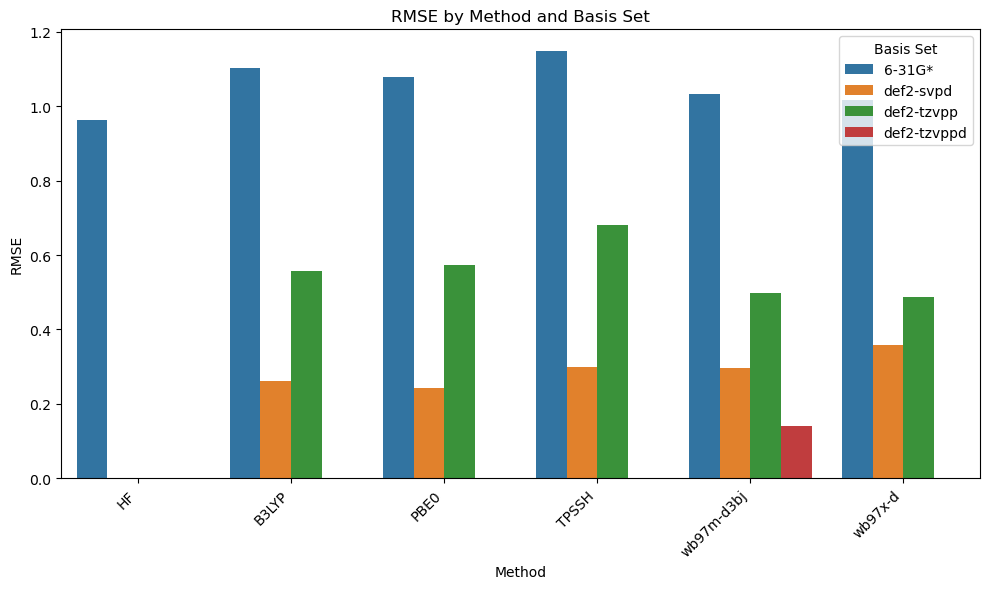

In [75]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 1) Create the sample DataFrame:
# data = [
#     {"rmse": 0.141052, "spec": "gas-wb97m-d3bj-def2-tzvppd"},
#     {"rmse": 0.242333, "spec": "gas-PBE0-def2-svpd"},
#     {"rmse": 0.260872, "spec": "gas-B3LYP-def2-svpd"},
#     {"rmse": 0.296853, "spec": "gas-wb97m-d3bj-def2-svpd"},
#     {"rmse": 0.299312, "spec": "gas-TPSSH-def2-svpd"},
#     {"rmse": 0.357396, "spec": "gas-wb97x-d-def2-svpd"},
#     {"rmse": 0.486853, "spec": "gas-wb97x-d-def2-tzvpp"},
#     {"rmse": 0.498316, "spec": "gas-wb97m-d3bj-def2-tzvpp"},
#     {"rmse": 0.555996, "spec": "gas-B3LYP-def2-tzvpp"},
#     {"rmse": 0.572233, "spec": "gas-PBE0-def2-tzvpp"},
#     {"rmse": 0.680592, "spec": "gas-TPSSH-def2-tzvpp"},
#     {"rmse": 0.962519, "spec": "gas-HF-6-31G*"},
#     {"rmse": 1.017840, "spec": "gas-wb97x-d-6-31G*"},
#     {"rmse": 1.031628, "spec": "gas-wb97m-d3bj-6-31G*"},
#     {"rmse": 1.079133, "spec": "gas-PBE0-6-31G*"},
#     {"rmse": 1.101943, "spec": "gas-B3LYP-6-31G*"},
#     {"rmse": 1.149133, "spec": "gas-TPSSH-6-31G*"},
# ]
df = df_dft_rmse_esp

# 2) Parse out the method and basis
def parse_spec(spec):
    known_bases = {"6-31G*", "def2-svpd", "def2-tzvpp", "def2-tzvppd"}
    # Remove "gas-" from the beginning
    spec_core = spec[4:]
    parts = spec_core.split('-')
    
    # Identify the basis from the end
    for i in range(1, 3):  
        # Join the last i elements
        possible_basis = '-'.join(parts[-i:])
        if possible_basis in known_bases:
            basis = possible_basis
            # The method is everything else
            method = '-'.join(parts[:-i])
            return method, basis
    return None, None

df["method"], df["basis"] = zip(*df["spec"].apply(parse_spec))

# 3) Define the orders (optional, for nicer grouping)
method_order = ["HF", "B3LYP", "PBE0", "TPSSH", "wb97m-d3bj", "wb97x-d"]
basis_order  = ["6-31G*", "def2-svpd", "def2-tzvpp", "def2-tzvppd"]

# 4) Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df, 
    x="method", 
    y="rmse", 
    hue="basis",
    order=method_order, 
    hue_order=basis_order
)
plt.title("RMSE by Method and Basis Set")
plt.xticks(rotation=45, ha="right")
plt.ylabel("RMSE")
plt.xlabel("Method")
plt.legend(title="Basis Set")
plt.tight_layout()
plt.show()
